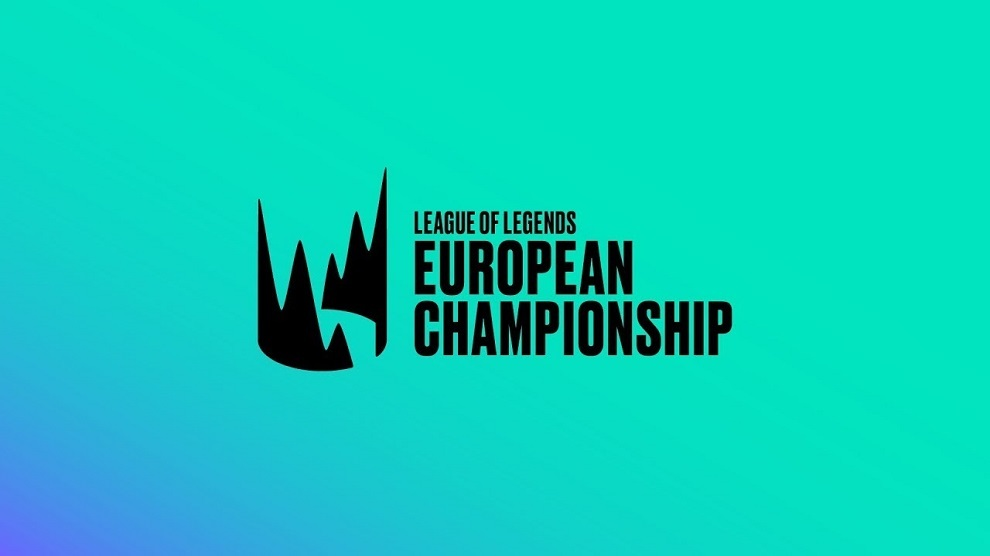


In this book, an analysis of the first 9 games of the league european championship (lec) will be made. it will follow the following order: 

- First: player performance; 
- Second: team performance; 
- Third: champion & player performance               
            

# Importing modules

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


## Loading Dataset

In [5]:

link_alldata_2022 = 'https://oracleselixir-downloadable-match-data.s3-us-west-2.amazonaws.com/2022_LoL_esports_match_data_from_OraclesElixir_20220214.csv'
 
today = dt.datetime.now().strftime("%Y%m%d")    
LEC_mid_season = "20220207"   # Checkpoint for mid season. 

link_alldata_2022 = link_alldata_2022.replace('20220214', LEC_mid_season)      

spring_2022_alldata = pd.read_csv(link_alldata_2022)

spring_2022_alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13956 entries, 0 to 13955
Columns: 123 entries, gameid to opp_deathsat15
dtypes: float64(85), int64(20), object(18)
memory usage: 12.1+ MB


In [6]:

leagues = spring_2022_alldata['league'].unique()    
datasets = ['Player','Team','Champion']

# league = input(f" Select a league from the following list: {leagues} = " )
league = 'LEC'

# dataset = input(f" Select a dataset you want to access: {datasets} = ")



## GLOSSARY 

##  Filtering data per League & Season

In [7]:
LEC_teams = ['Astralis', 'Excel Esports', 'Fnatic','G2 Esports', 'MAD Lions',
              'Misfits Gaming','Rogue','SK Gaming','Team BDS','Team Vitality']

pd.options.display.float_format = '{:,.2f}'.format


spring_2022_alldata['date'] = pd.to_datetime(spring_2022_alldata['date'], format ='%Y-%m-%d %H:%M:%S')


data_A = spring_2022_alldata.loc[(spring_2022_alldata['league'] == league) & (spring_2022_alldata['playoffs'] == 0)
                                 & (spring_2022_alldata['split'] == 'Spring')]
                            
minute = 60    
data_A['gamelength'] = data_A['gamelength'] / minute     

data_A.rename(columns = {'position': 'Pos', 'teamname':'Team', 'gameid':'GP','kills':'K','deaths':'D','assists':'A',
                        'golddiffat10': 'GD10', 'golddiffat15':'GD15','xpdiffat10':'XPD10','csdiffat10':'CSD10','cspm':'CSPM',
                        'dpm':'DPM','damageshare':'DMG%', 'earned gpm':'EGPM', 'earnedgoldshare':'GOLD%', 'goldat10':'G10',
                        'xpat10':'XP10','csat10':'CS10','killsat10':'K10','assistsat10':'A10','deathsat10':'D10',
                        'csat15':'CS15', 'killsat15':'K15','assistsat15':'A15','deathsat15':'D15','goldat15':'G15',
                        'teamkills':'TK', 'teamdeaths':'TD', 'gamelength':'AGT','playername': 'Player'},inplace =True)

# Renaming some columns for consistency purposes. Most websites and users of these stats use standardized nomenclature. 


<ipython-input-7-4689f6c47820>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_A['gamelength'] = data_A['gamelength'] / minute
C:\Users\Guillo\PycharmProjects\Mosh\test\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
# for col_name in data_A.columns: 
#     print(col_name)

## Selecting specific columns & grouping 

In [9]:

spring_player22 = data_A[['Player','Team','Pos','GP','result','K','D','A','TK','TD','AGT','GD10','GD15','XPD10','CSD10',
                          'CSPM','DPM','DMG%','EGPM','GOLD%','G10','XP10','CS10','K10','D10','A10','G15','CS15','K15','D15','A15']]

# Groupby Team and player. Multi-indexing in the process. Aggregate stadistics will be applied: 


groupby_player_dict = {'GP':'nunique','result':'sum','K':'mean','D':'mean','A':'mean','TK':'mean','TD':'mean', 'AGT':'mean','GD10':'mean',
                'GD15':'mean','XPD10':'mean','CSD10':'mean','CSPM':'mean','DPM':'mean','DMG%':'mean','EGPM':'mean','GOLD%':'mean',
                'G10':'mean','XP10':'mean','CS10':'mean','K10':'mean','D10':'mean','A10':'mean','G15':'mean','CS15':'mean',
                'K15':'mean','D15':'mean','A15':'mean'}

spring_player22 = spring_player22.groupby(['Player','Team','Pos']).agg(groupby_player_dict)

spring_player22.head()


,,,GP,result,K,D,A,TK,TD,AGT,GD10,GD15,...,XP10,CS10,K10,D10,A10,G15,CS15,K15,D15,A15
Player,Team,Pos,,,,,,,,,,,,,,,,,,,,,
Adam,Team BDS,top,9,3,2.22,3.44,3.67,10.67,14.56,33.04,-352.22,-513.44,...,"4,294.33",77.44,0.11,0.56,0.33,"5,167.89",131.33,0.33,0.67,0.44
Advienne,Excel Esports,sup,5,2,0.40,3.20,9.60,12.60,14.20,37.26,20.20,-51.00,...,"2,393.40",11.80,0.00,0.20,1.20,"3,189.60",19.80,0.00,0.20,2.00
Alphari,Team Vitality,top,9,5,2.89,2.78,4.00,13.44,13.22,32.17,214.22,207.67,...,"4,616.44",84.78,0.44,0.67,0.56,"5,475.67",135.00,0.67,1.33,0.67
Armut,MAD Lions,top,9,5,3.11,3.22,5.89,15.22,16.11,36.09,38.33,99.00,...,"4,721.00",83.67,0.11,0.33,0.33,"5,241.22",136.22,0.33,0.44,0.56
Broken Blade,G2 Esports,top,9,6,4.00,2.00,5.89,14.56,11.56,32.95,121.00,508.56,...,"4,561.56",78.89,0.33,0.22,0.33,"5,421.67",129.89,0.78,0.33,0.56


### Adding new columns, values format changes

In [10]:

spring_player22['KP'] = ((spring_player22['K'] + spring_player22['A']) / spring_player22['TK'])
spring_player22['KS%'] = (spring_player22['K'] / spring_player22['TK']) 
spring_player22['KD%'] = (spring_player22['D'] / spring_player22['TD']) 

spring_player22['WR'] = (spring_player22['result'] / spring_player22['GP']) 
spring_player22['KDA'] = (spring_player22['K']+ spring_player22['A']) / spring_player22['D']

spring_player22['K&A10'] = spring_player22['K10'] + spring_player22['A10'] 
spring_player22['K&A15'] =  spring_player22['K15'] + spring_player22['A15']

spring_player22['DMGOLD'] = spring_player22['DMG%'] / spring_player22['GOLD%'] 
spring_player22['DGmin'] =  spring_player22['DPM'] / spring_player22['EGPM']

# We would be missing 3 columns now:  'CTR%','FB%','CS%P15' . These will be added later on through scraping. 


spring_player22.head()




,,,GP,result,K,D,A,TK,TD,AGT,GD10,GD15,...,A15,KP,KS%,KD%,WR,KDA,K&A10,K&A15,DMGOLD,DGmin
Player,Team,Pos,,,,,,,,,,,,,,,,,,,,,
Adam,Team BDS,top,9,3,2.22,3.44,3.67,10.67,14.56,33.04,-352.22,-513.44,...,0.44,0.55,0.21,0.24,0.33,1.71,0.44,0.78,0.94,1.48
Advienne,Excel Esports,sup,5,2,0.40,3.20,9.60,12.60,14.20,37.26,20.20,-51.00,...,2.00,0.79,0.03,0.23,0.40,3.12,1.20,2.00,0.63,1.14
Alphari,Team Vitality,top,9,5,2.89,2.78,4.00,13.44,13.22,32.17,214.22,207.67,...,0.67,0.51,0.21,0.21,0.56,2.48,1.00,1.33,1.07,1.78
Armut,MAD Lions,top,9,5,3.11,3.22,5.89,15.22,16.11,36.09,38.33,99.00,...,0.56,0.59,0.20,0.20,0.56,2.79,0.44,0.89,1.04,1.87
Broken Blade,G2 Esports,top,9,6,4.00,2.00,5.89,14.56,11.56,32.95,121.00,508.56,...,0.56,0.68,0.27,0.17,0.67,4.94,0.67,1.33,1.23,2.05


In [11]:
spring_player22.reset_index(inplace = True)
spring_player22.to_csv(f'{league}_spring_player22.csv', index = False)        

## Filtering by Player Position

In order to compare each of the players, we need to make a new table for each position: 

- TOP
- Jungle
- Middle
- ADC
- SUPP

Main Parameters to graph / analyse: 

Performance: 

- KDA
- CSPM
- GD15
- DPM & EGPM
- DMGOLD %


In [12]:
spring_TOP = spring_player22.loc[spring_player22['Pos'] == 'top'].reset_index() 
spring_JNG = spring_player22.loc[spring_player22['Pos'] == 'jng'].reset_index() 
spring_MID = spring_player22.loc[spring_player22['Pos'] == 'mid'].reset_index() 
spring_ADC = spring_player22.loc[spring_player22['Pos'] == 'bot'].reset_index()  
spring_SUPP =spring_player22.loc[spring_player22['Pos'] == 'sup'].reset_index()  

# spring_TOP
# spring_JNG
# spring_MID
# spring_ADC
# spring_SUPP

# Data Visualization League European Championship (LEC) 2022

## TOP LANE ANALYSIS

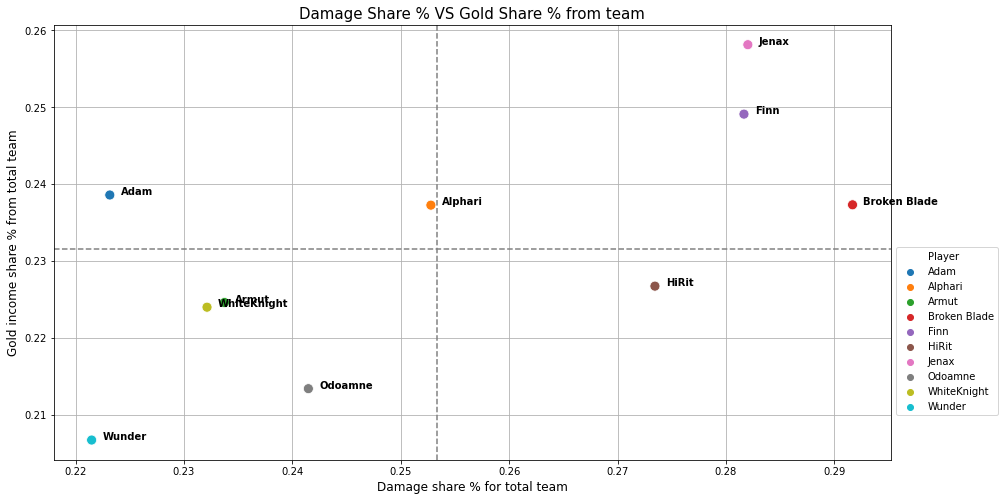

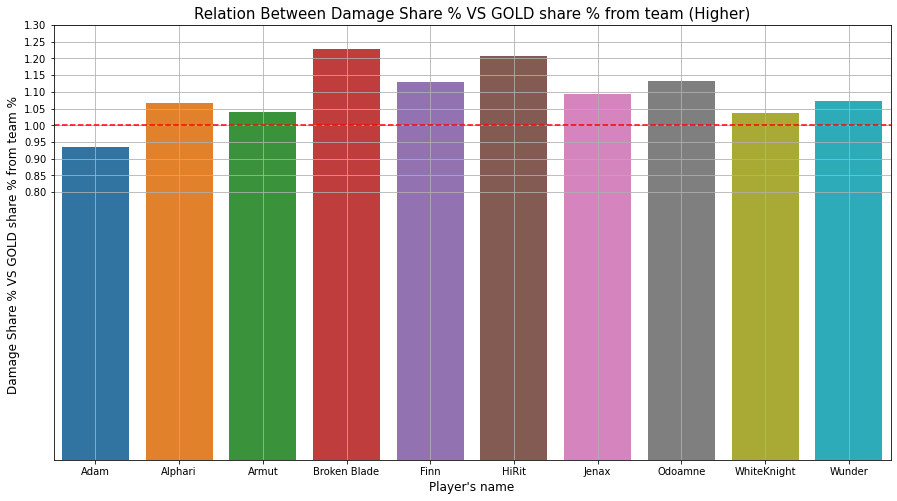

In [13]:
title_fontsize = 15
label_fontsize = 12

plt.figure(figsize = (15,8)) 

g1 = sns.scatterplot(data =spring_TOP, x= spring_TOP['DMG%'], y= spring_TOP['GOLD%'], hue = 'Player', s=100)

plt.title('Damage Share % VS Gold Share % from team', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel('Damage share % for total team', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Gold income share % from total team', fontsize = label_fontsize)
# set avg grey lines
plt.axvline(x=spring_TOP['DMG%'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_TOP['GOLD%'].mean(), color='grey', linestyle='--')

g1.legend(bbox_to_anchor=(1, 0.5))
plt.grid()

# looping each player's name into each point. 

for line in range(0,spring_TOP.shape[0]):
     g1.text(spring_TOP['DMG%'][line]+0.001,spring_TOP['GOLD%'][line], 
     spring_TOP.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
        

plt.figure(figsize = (15,8))


b1 = sns.barplot(data =spring_TOP, x= spring_TOP['Player'], y= spring_TOP['DMGOLD'])

plt.title('Relation Between Damage Share % VS GOLD share % from team (Higher)', fontsize =title_fontsize)
# Set x-axis label
plt.xlabel("Player's name",fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Damage Share % VS GOLD share % from team % ', fontsize = label_fontsize)

plt.axhline(y=1, color='red', linestyle='--')            

plt.yticks([.8,.85,.9,.95,1,1.05,1.1,1.15,1.2,1.25,1.3])

plt.grid()





Graph 1 (g1) - Damage Share % VS Gold Share % from team.

Graph 2 (b1) - Damage share % Per Gold share % from team. 

- Higher than 1 = Efficient use of gold on the player, contributes effectively on total damage dealt by team. Good on weak Side, Good on Carrys. Better suited for strong bruisers, mages,  lucian, or late-game. 

- Equal or lower than 1 = Low interactivity in lane due to strong split pusher pick or Tank role / CC role. Not so efficient on carries, better suited for high-impact teamfighting champs. 


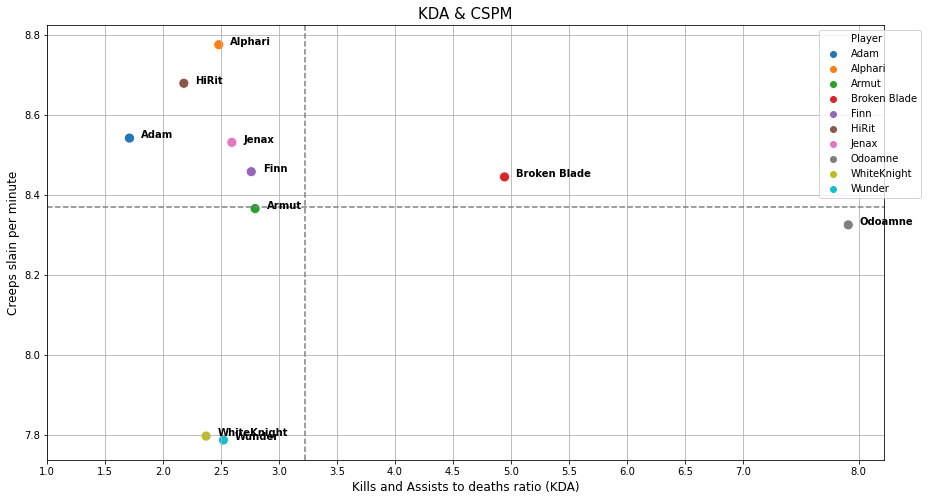

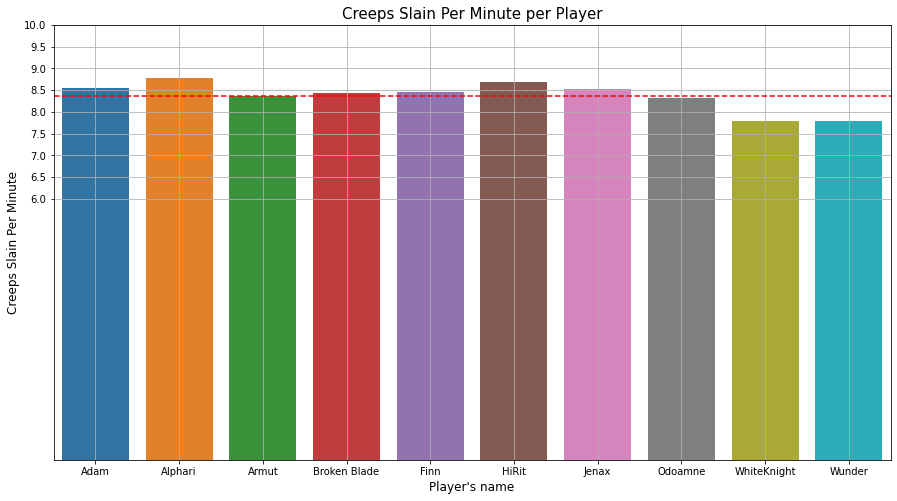

In [14]:
plt.figure(figsize = (15,8))  
g2 = sns.scatterplot(data =spring_TOP, x= spring_TOP['KDA'], y= spring_TOP['CSPM'], hue = 'Player', s=100)

plt.title('KDA & CSPM', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel('Kills and Assists to deaths ratio (KDA)', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Creeps slain per minute', fontsize= label_fontsize)
plt.grid()

plt.xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,8])

plt.axvline(x=spring_TOP['KDA'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_TOP['CSPM'].mean(), color='grey', linestyle='--')

g2.legend(bbox_to_anchor=(1.05, 1))

for line in range(0,spring_TOP.shape[0]):
     g2.text(spring_TOP.KDA[line]+0.1,spring_TOP.CSPM[line], 
     spring_TOP.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
                
plt.figure(figsize = (15,8))       

b2 = sns.barplot(data =spring_TOP, x= spring_TOP['Player'], y= spring_TOP['CSPM'])

plt.title('Creeps Slain Per Minute per Player', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel("Player's name", fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Creeps Slain Per Minute', fontsize = label_fontsize)

plt.yticks([6,6.5,7,7.5,8,8.5,9,9.5,10])
plt.grid()

avgcspm= spring_TOP['CSPM'].mean()
plt.axhline(y=avgcspm, color='red', linestyle='--')


Graph 3 (g2) - Kills and Assists to deaths ratio (KDA) & Creeps slain per minute (CSPM)

Graph 4 (b2) - Damage share % Per Gold share % from team. 

 - Higher than AVG: Side lane priority, with strong mid-late game champs who can clear efficiently. Groups much less than their opponents. 
 
 - Lower than AVG: Weak on side-lanes, playing catch-up rather than applying pressure. Does not clear effectevely, sometimes weak-side. Groups much more than their opponents, usually a tank or engage machine to start up fights. 

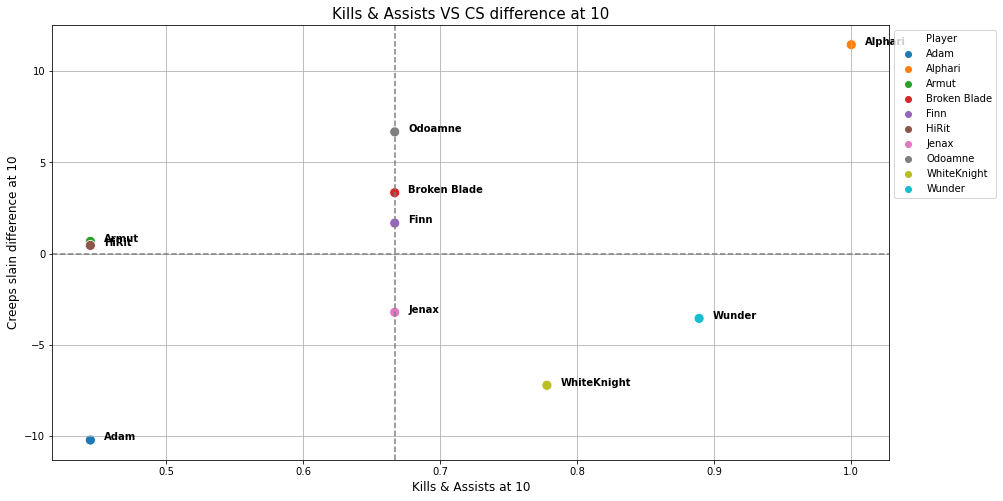

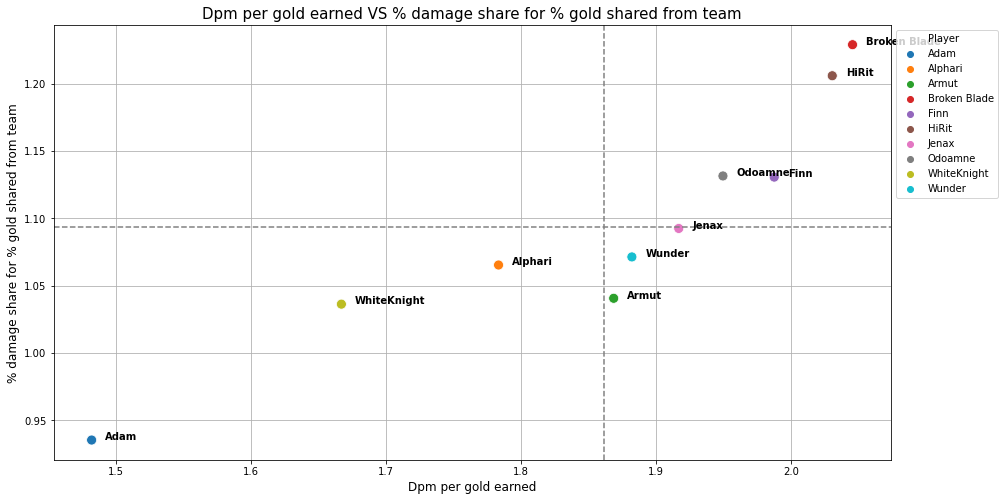

<Figure size 1080x576 with 0 Axes>

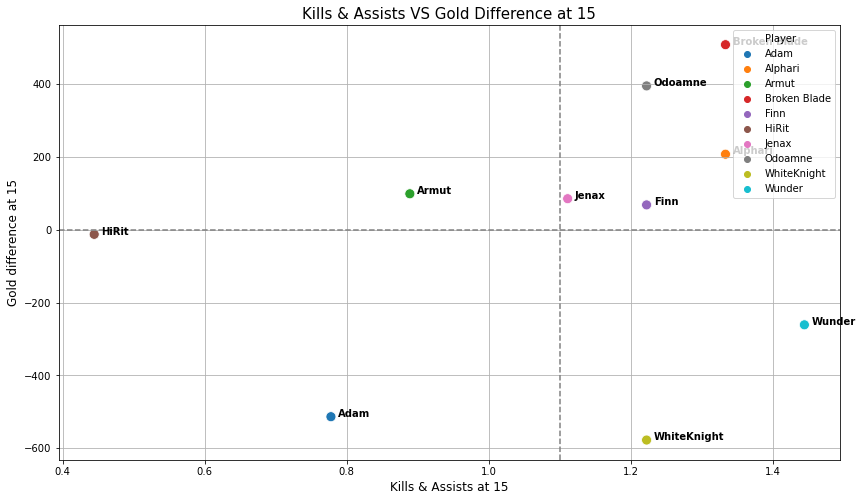

In [15]:
plt.figure(figsize = (15,8))
g3 = sns.scatterplot(data =spring_TOP, x= spring_TOP['K&A10'], y= spring_TOP['CSD10'], hue = 'Player', s=100)

plt.title('Kills & Assists VS CS difference at 10', fontsize = title_fontsize )
# Set x-axis label
plt.xlabel('Kills & Assists at 10', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Creeps slain difference at 10', fontsize = label_fontsize)
plt.grid()

plt.axvline(x=spring_TOP['K&A10'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_TOP['CSD10'].mean(), color='grey', linestyle='--')

g3.legend(bbox_to_anchor=(1, 1))

for line in range(0,spring_TOP.shape[0]):
     g3.text(spring_TOP['K&A10'][line]+0.01,spring_TOP.CSD10[line], 
     spring_TOP.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
plt.show()


plt.figure(figsize = (15,8))
g4 = sns.scatterplot(data =spring_TOP, x= spring_TOP['DGmin'], y= spring_TOP['DMGOLD'], hue = 'Player', s=100)

plt.title('Dpm per gold earned VS % damage share for % gold shared from team', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel('Dpm per gold earned', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('% damage share for % gold shared from team', fontsize = label_fontsize)
plt.grid()

plt.axvline(x=spring_TOP['DGmin'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_TOP['DMGOLD'].mean(), color='grey', linestyle='--')

g4.legend(bbox_to_anchor=(1, 1))

for line in range(0,spring_TOP.shape[0]):
     g4.text(spring_TOP['DGmin'][line]+0.01,spring_TOP.DMGOLD[line], 
     spring_TOP.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
plt.show()

plt.figure(figsize = (15,8)) 


plt.figure(figsize = (14,8))
g5 = sns.scatterplot(data =spring_TOP, x= spring_TOP['K&A15'], y= spring_TOP['GD15'], hue = 'Player', s=100)

plt.title('Kills & Assists VS Gold Difference at 15', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel('Kills & Assists at 15', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Gold difference at 15', fontsize = label_fontsize)
plt.grid()

for line in range(0,spring_TOP.shape[0]):
     g5.text(spring_TOP['K&A15'][line]+0.01,spring_TOP.GD15[line], 
     spring_TOP.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

plt.axvline(x=spring_TOP['K&A15'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_TOP['GD15'].mean(), color='grey', linestyle='--')     
        
g5.legend(bbox_to_anchor=(1, 1))
plt.show()


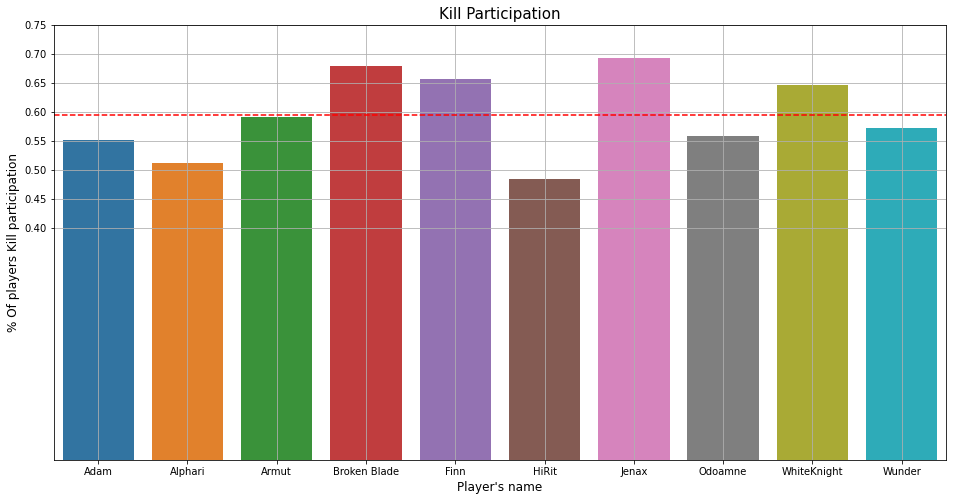

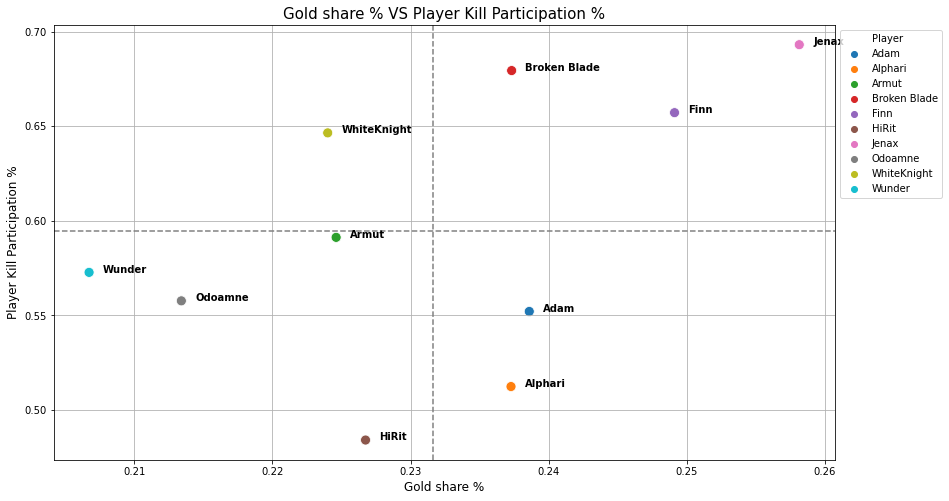

In [16]:


plt.figure(figsize = (16,8))
b3 = sns.barplot(data =spring_TOP, x= spring_TOP['Player'], y= spring_TOP['KP'])

plt.title('Kill Participation', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel("Player's name", fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('% Of players Kill participation',fontsize = label_fontsize)

plt.yticks([.4,.45,.5,.55,.6,.65,.7,.75])
plt.axhline(y=spring_TOP['KP'].mean(), color='red', linestyle='--')

plt.grid()

plt.figure(figsize = (14,8))
g5 = sns.scatterplot(data =spring_TOP, x= spring_TOP['GOLD%'], y= spring_TOP['KP'], hue = 'Player', s=100)

plt.title('Gold share % VS Player Kill Participation %', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel('Gold share %', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Player Kill Participation %', fontsize = label_fontsize)
plt.grid()

for line in range(0,spring_TOP.shape[0]):
     g5.text(spring_TOP['GOLD%'][line]+0.001,spring_TOP.KP[line], 
     spring_TOP.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
        
        
plt.axvline(x=spring_TOP['GOLD%'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_TOP['KP'].mean(), color='grey', linestyle='--')  

g5.legend(bbox_to_anchor=(1, 1))



## MIDLANE VISUALIZATION & ANALYSIS

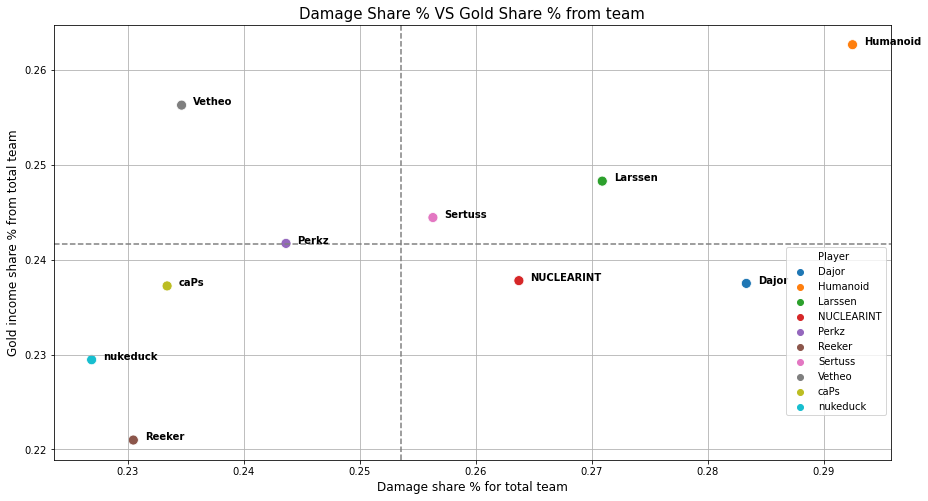

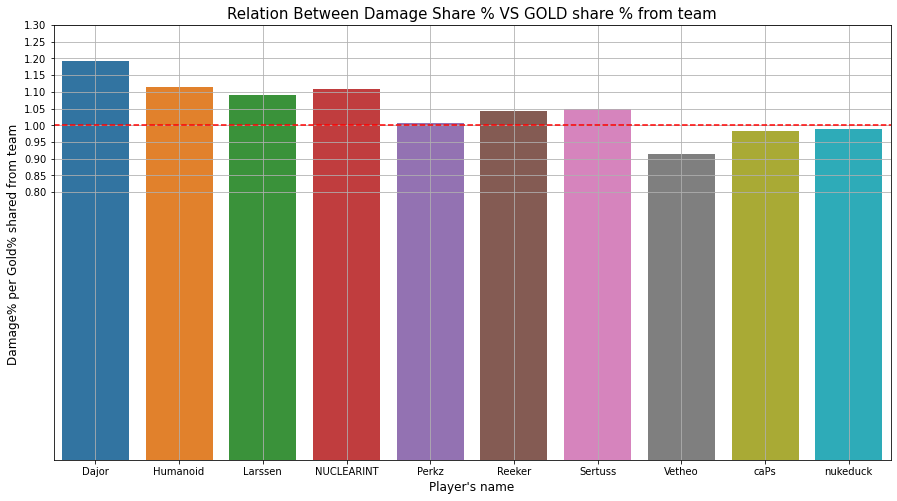

In [17]:
plt.figure(figsize = (15,8)) 

g1 = sns.scatterplot(data =spring_MID, x= spring_MID['DMG%'], y= spring_MID['GOLD%'], hue = 'Player', s=100)

plt.title('Damage Share % VS Gold Share % from team', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel('Damage share % for total team', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Gold income share % from total team', fontsize = label_fontsize)
# set avg grey lines
plt.axvline(x=spring_MID['DMG%'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_MID['GOLD%'].mean(), color='grey', linestyle='--')

g1.legend(bbox_to_anchor=(1, 0.5))
plt.grid()

# looping each player's name into each point. 

for line in range(0,spring_MID.shape[0]):
     g1.text(spring_MID['DMG%'][line]+0.001,spring_MID['GOLD%'][line], 
     spring_MID.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
        

plt.figure(figsize = (15,8))


b1 = sns.barplot(data =spring_MID, x= spring_MID['Player'], y= spring_MID['DMGOLD'])

plt.title('Relation Between Damage Share % VS GOLD share % from team', fontsize =title_fontsize)
# Set x-axis label
plt.xlabel("Player's name",fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Damage% per Gold% shared from team ', fontsize = label_fontsize)

plt.axhline(y=1, color='red', linestyle='--')            

plt.yticks([.8,.85,.9,.95,1,1.05,1.1,1.15,1.2,1.25,1.3])

plt.grid()





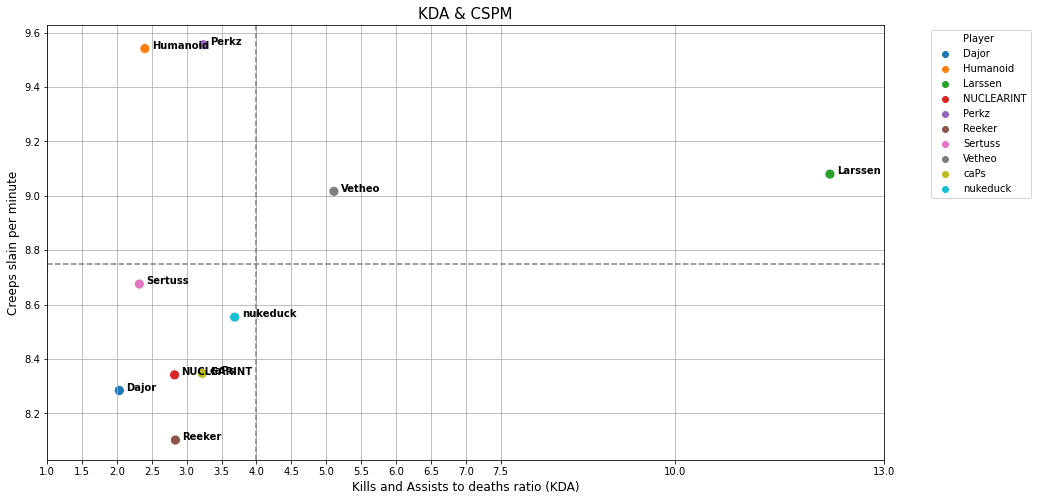

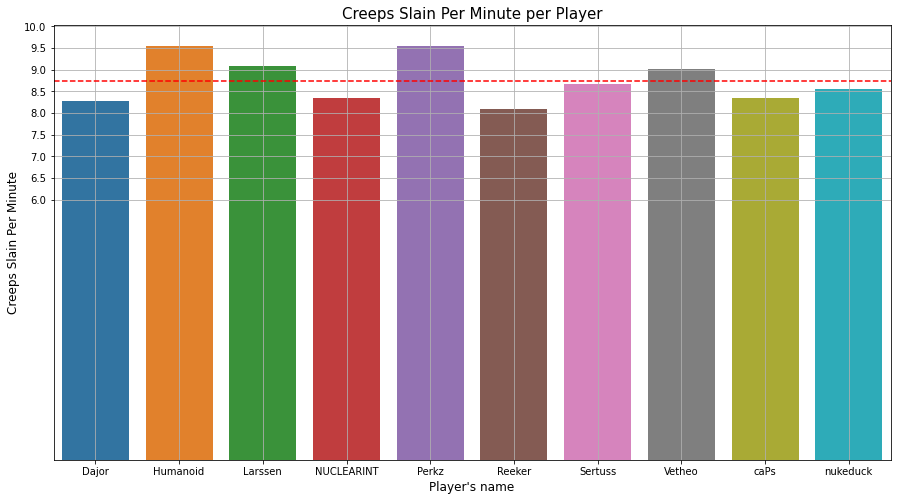

In [18]:
plt.figure(figsize = (15,8))  
g2 = sns.scatterplot(data =spring_MID, x= spring_MID['KDA'], y= spring_MID['CSPM'], hue = 'Player', s=100)

plt.title('KDA & CSPM', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel('Kills and Assists to deaths ratio (KDA)', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Creeps slain per minute', fontsize= label_fontsize)
plt.grid()

plt.xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,10,13])

plt.axvline(x=spring_MID['KDA'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_MID['CSPM'].mean(), color='grey', linestyle='--')

g2.legend(bbox_to_anchor=(1.05, 1))

for line in range(0,spring_MID.shape[0]):
     g2.text(spring_MID.KDA[line]+0.1,spring_MID.CSPM[line], 
     spring_MID.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
                
plt.figure(figsize = (15,8))       

b2 = sns.barplot(data =spring_MID, x= spring_MID['Player'], y= spring_MID['CSPM'])

plt.title('Creeps Slain Per Minute per Player', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel("Player's name", fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Creeps Slain Per Minute', fontsize = label_fontsize)

plt.yticks([6,6.5,7,7.5,8,8.5,9,9.5,10])
plt.grid()

avgcspm= spring_MID['CSPM'].mean()
plt.axhline(y=avgcspm, color='red', linestyle='--')


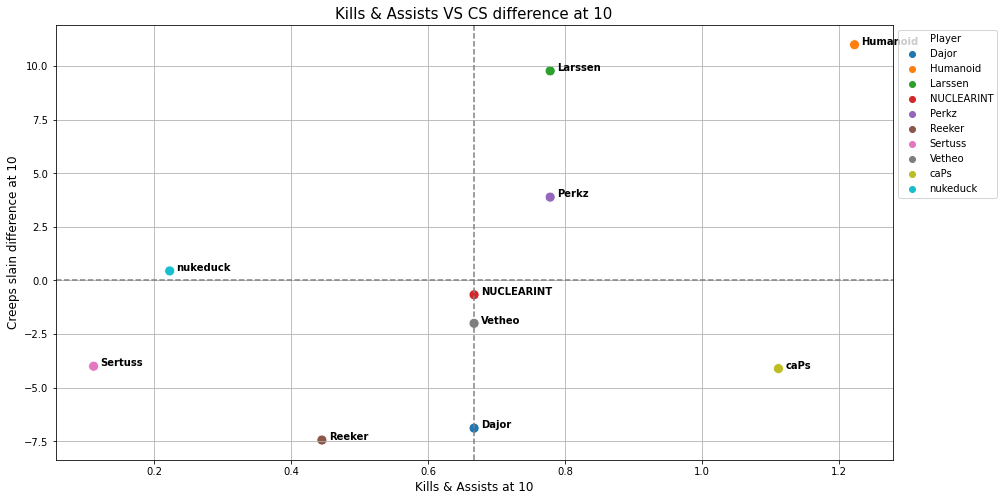

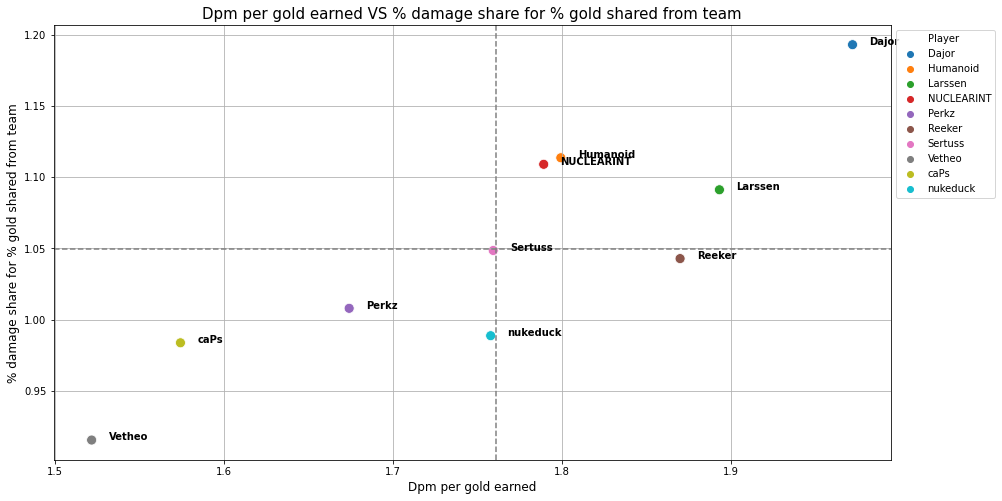

<Figure size 1080x576 with 0 Axes>

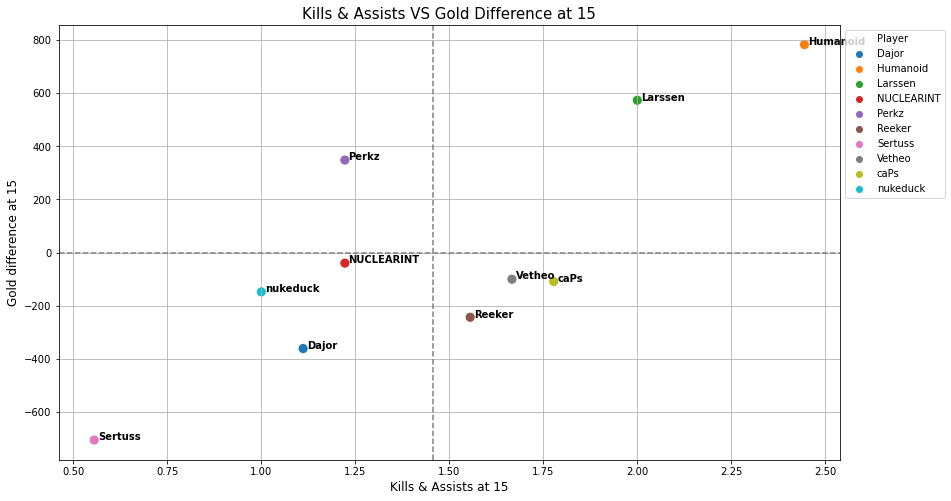

In [19]:
plt.figure(figsize = (15,8))
g3 = sns.scatterplot(data =spring_MID, x= spring_MID['K&A10'], y= spring_MID['CSD10'], hue = 'Player', s=100)

plt.title('Kills & Assists VS CS difference at 10', fontsize = title_fontsize )
# Set x-axis label
plt.xlabel('Kills & Assists at 10', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Creeps slain difference at 10', fontsize = label_fontsize)
plt.grid()

plt.axvline(x=spring_MID['K&A10'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_MID['CSD10'].mean(), color='grey', linestyle='--')

g3.legend(bbox_to_anchor=(1, 1))

for line in range(0,spring_MID.shape[0]):
     g3.text(spring_MID['K&A10'][line]+0.01,spring_MID.CSD10[line], 
     spring_MID.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
plt.show()


plt.figure(figsize = (15,8))
g4 = sns.scatterplot(data =spring_MID, x= spring_MID['DGmin'], y= spring_MID['DMGOLD'], hue = 'Player', s=100)

plt.title('Dpm per gold earned VS % damage share for % gold shared from team', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel('Dpm per gold earned', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('% damage share for % gold shared from team', fontsize = label_fontsize)
plt.grid()

plt.axvline(x=spring_MID['DGmin'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_MID['DMGOLD'].mean(), color='grey', linestyle='--')

g4.legend(bbox_to_anchor=(1, 1))

for line in range(0,spring_MID.shape[0]):
     g4.text(spring_MID['DGmin'][line]+0.01,spring_MID.DMGOLD[line], 
     spring_MID.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
plt.show()

plt.figure(figsize = (15,8)) 


plt.figure(figsize = (14,8))
g5 = sns.scatterplot(data =spring_MID, x= spring_MID['K&A15'], y= spring_MID['GD15'], hue = 'Player', s=100)

plt.title('Kills & Assists VS Gold Difference at 15', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel('Kills & Assists at 15', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Gold difference at 15', fontsize = label_fontsize)
plt.grid()

for line in range(0,spring_MID.shape[0]):
     g5.text(spring_MID['K&A15'][line]+0.01,spring_MID.GD15[line], 
     spring_MID.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

plt.axvline(x=spring_MID['K&A15'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_MID['GD15'].mean(), color='grey', linestyle='--')     
        
g5.legend(bbox_to_anchor=(1, 1))
plt.show()


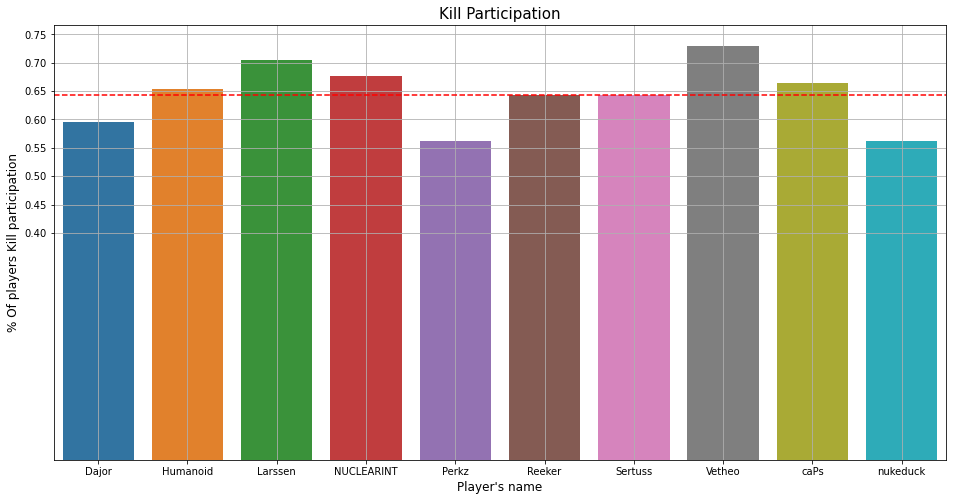

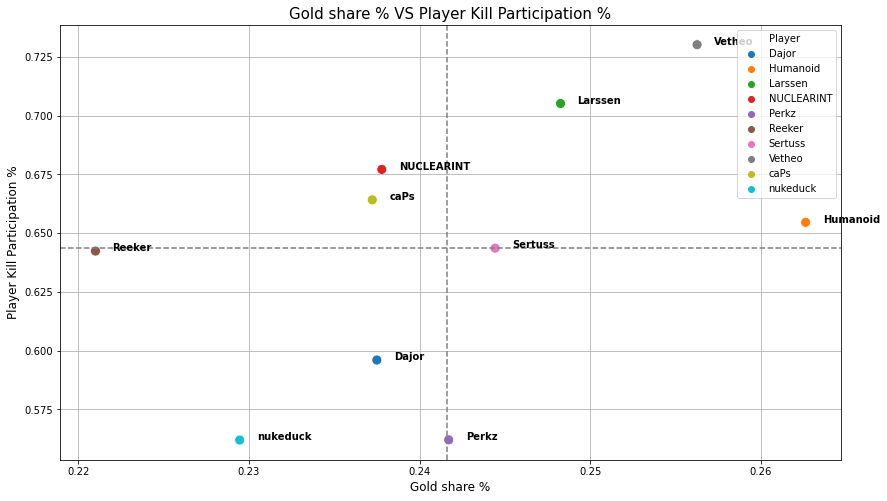

In [20]:

plt.figure(figsize = (16,8))
b3 = sns.barplot(data =spring_MID, x= spring_MID['Player'], y= spring_MID['KP'])

plt.title('Kill Participation', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel("Player's name", fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('% Of players Kill participation',fontsize = label_fontsize)

plt.yticks([.4,.45,.5,.55,.6,.65,.7,.75])
plt.axhline(y=spring_MID['KP'].mean(), color='red', linestyle='--')

plt.grid()

plt.figure(figsize = (14,8))
g5 = sns.scatterplot(data =spring_MID, x= spring_MID['GOLD%'], y= spring_MID['KP'], hue = 'Player', s=100)

plt.title('Gold share % VS Player Kill Participation %', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel('Gold share %', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Player Kill Participation %', fontsize = label_fontsize)
plt.grid()

for line in range(0,spring_MID.shape[0]):
     g5.text(spring_MID['GOLD%'][line]+0.001,spring_MID.KP[line], 
     spring_MID.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
        
        
plt.axvline(x=spring_MID['GOLD%'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_MID['KP'].mean(), color='grey', linestyle='--')  

g5.legend(bbox_to_anchor=(1, 1))


## BOT LANE (ADC) ANALYSIS & COMPARISON

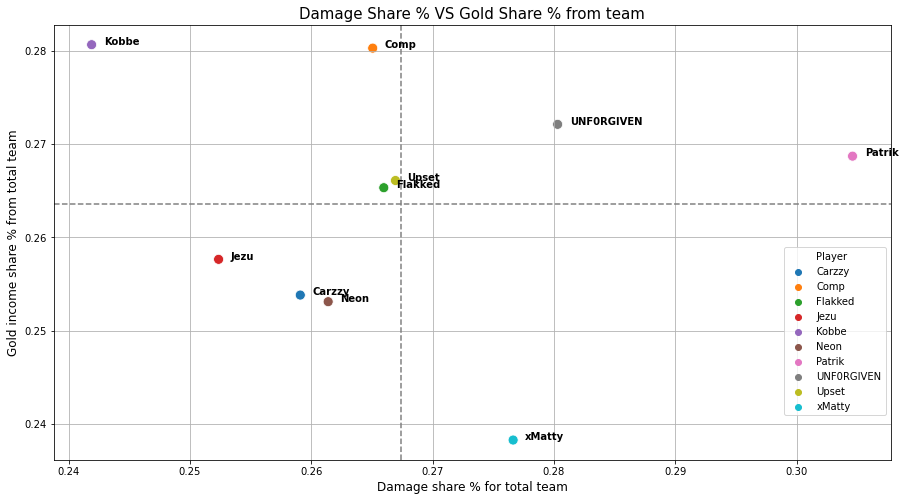

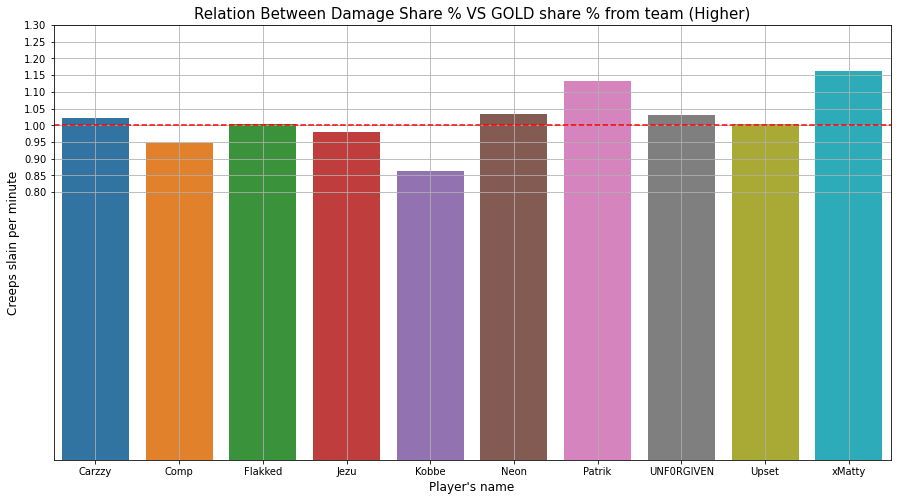

In [21]:
plt.figure(figsize = (15,8)) 

g1 = sns.scatterplot(data =spring_ADC, x= spring_ADC['DMG%'], y= spring_ADC['GOLD%'], hue = 'Player', s=100)

plt.title('Damage Share % VS Gold Share % from team', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel('Damage share % for total team', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Gold income share % from total team', fontsize = label_fontsize)
# set avg grey lines
plt.axvline(x=spring_ADC['DMG%'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_ADC['GOLD%'].mean(), color='grey', linestyle='--')

g1.legend(bbox_to_anchor=(1, 0.5))
plt.grid()

# looping each player's name into each point. 

for line in range(0,spring_ADC.shape[0]):
     g1.text(spring_ADC['DMG%'][line]+0.001,spring_ADC['GOLD%'][line], 
     spring_ADC.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
        

plt.figure(figsize = (15,8))


b1 = sns.barplot(data =spring_ADC, x= spring_ADC['Player'], y= spring_ADC['DMGOLD'])

plt.title('Relation Between Damage Share % VS GOLD share % from team (Higher)', fontsize =title_fontsize)
# Set x-axis label
plt.xlabel("Player's name",fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Creeps slain per minute', fontsize = label_fontsize)

plt.axhline(y=1, color='red', linestyle='--')            

plt.yticks([.8,.85,.9,.95,1,1.05,1.1,1.15,1.2,1.25,1.3])

plt.grid()




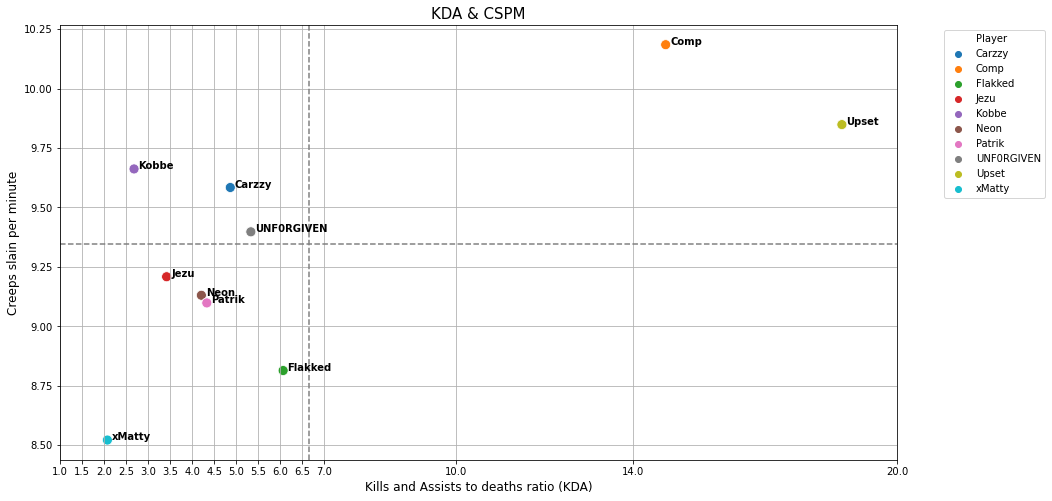

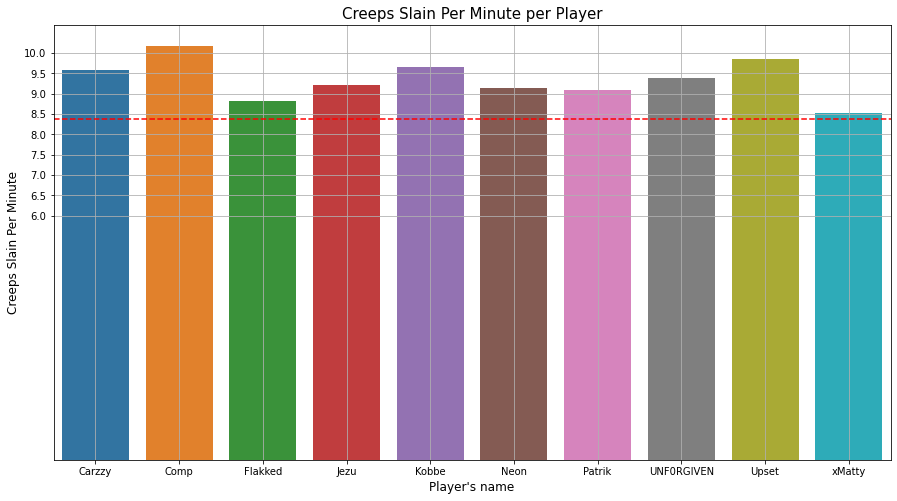

In [37]:
plt.figure(figsize = (15,8))  
g2 = sns.scatterplot(data =spring_ADC, x= spring_ADC['KDA'], y= spring_ADC['CSPM'], hue = 'Player', s=100)

plt.title('KDA & CSPM', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel('Kills and Assists to deaths ratio (KDA)', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Creeps slain per minute', fontsize= label_fontsize)
plt.grid()

plt.xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,10,14,20])

plt.axvline(x=spring_ADC['KDA'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_ADC['CSPM'].mean(), color='grey', linestyle='--')

g2.legend(bbox_to_anchor=(1.05, 1))

for line in range(0,spring_ADC.shape[0]):
     g2.text(spring_ADC.KDA[line]+0.1,spring_ADC.CSPM[line], 
     spring_ADC.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
                
plt.figure(figsize = (15,8))       

b2 = sns.barplot(data =spring_ADC, x= spring_ADC['Player'], y= spring_ADC['CSPM'])

plt.title('Creeps Slain Per Minute per Player', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel("Player's name", fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Creeps Slain Per Minute', fontsize = label_fontsize)

plt.yticks([6,6.5,7,7.5,8,8.5,9,9.5,10])
plt.grid()

avgcspm= spring_TOP['CSPM'].mean()
plt.axhline(y=avgcspm, color='red', linestyle='--')


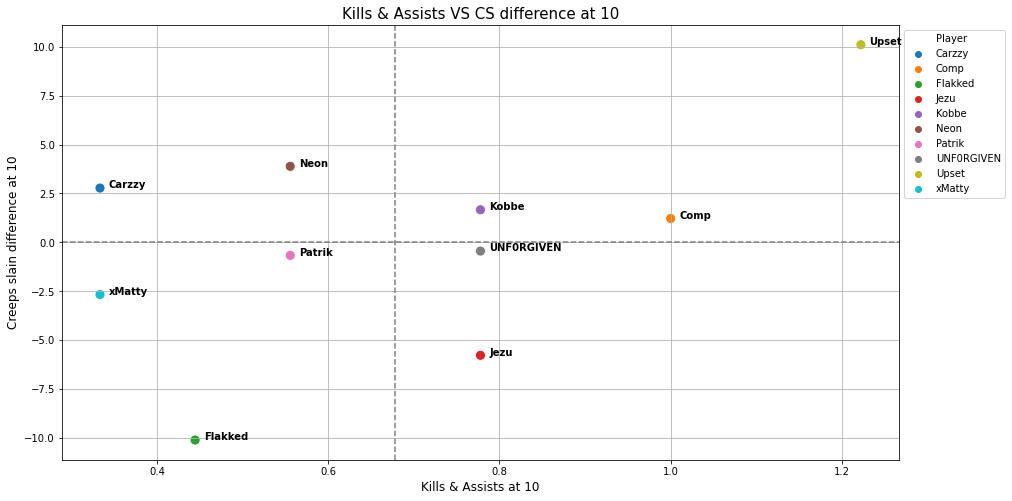

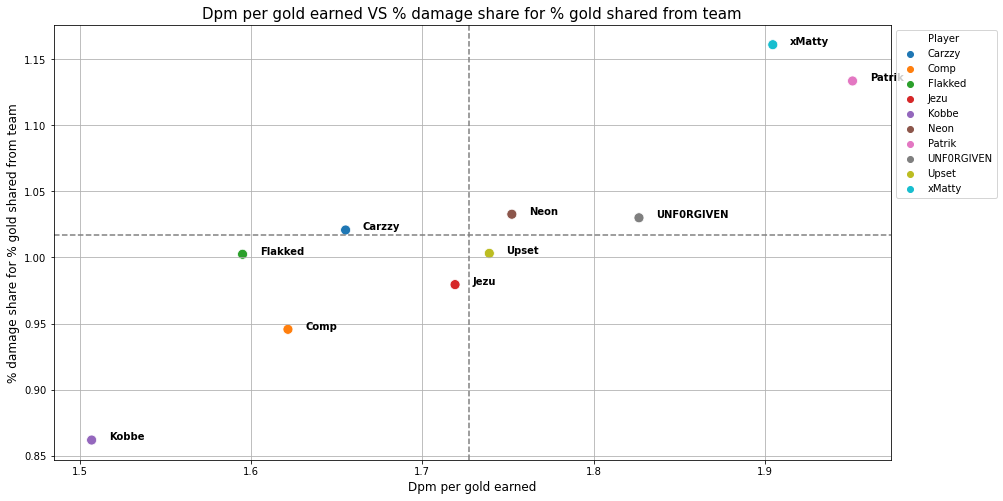

<Figure size 1080x576 with 0 Axes>

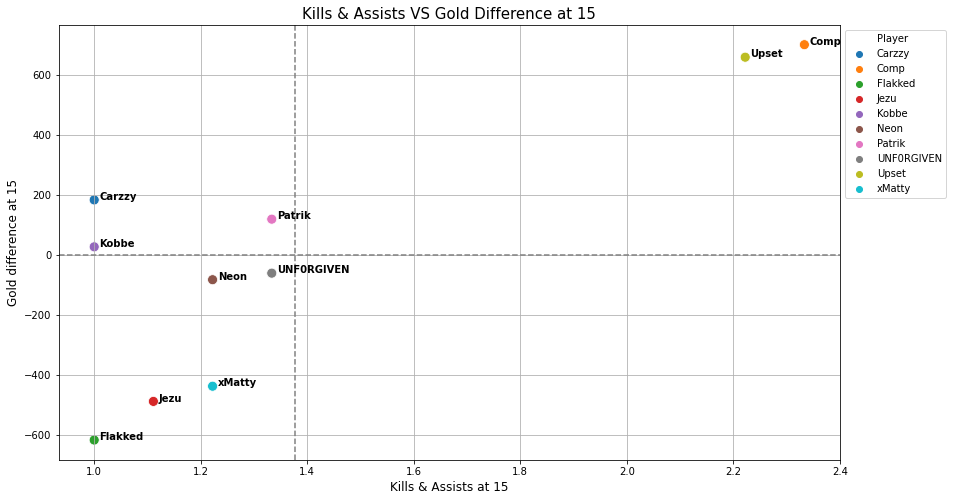

In [23]:
plt.figure(figsize = (15,8))
g3 = sns.scatterplot(data =spring_ADC, x= spring_ADC['K&A10'], y= spring_ADC['CSD10'], hue = 'Player', s=100)

plt.title('Kills & Assists VS CS difference at 10', fontsize = title_fontsize )
# Set x-axis label
plt.xlabel('Kills & Assists at 10', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Creeps slain difference at 10', fontsize = label_fontsize)
plt.grid()

plt.axvline(x=spring_ADC['K&A10'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_ADC['CSD10'].mean(), color='grey', linestyle='--')

g3.legend(bbox_to_anchor=(1, 1))

for line in range(0,spring_ADC.shape[0]):
     g3.text(spring_ADC['K&A10'][line]+0.01,spring_ADC.CSD10[line], 
     spring_ADC.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
plt.show()


plt.figure(figsize = (15,8))
g4 = sns.scatterplot(data =spring_ADC, x= spring_ADC['DGmin'], y= spring_ADC['DMGOLD'], hue = 'Player', s=100)

plt.title('Dpm per gold earned VS % damage share for % gold shared from team', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel('Dpm per gold earned', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('% damage share for % gold shared from team', fontsize = label_fontsize)
plt.grid()

plt.axvline(x=spring_ADC['DGmin'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_ADC['DMGOLD'].mean(), color='grey', linestyle='--')

g4.legend(bbox_to_anchor=(1, 1))

for line in range(0,spring_ADC.shape[0]):
     g4.text(spring_ADC['DGmin'][line]+0.01,spring_ADC.DMGOLD[line], 
     spring_ADC.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
plt.show()

plt.figure(figsize = (15,8)) 


plt.figure(figsize = (14,8))
g5 = sns.scatterplot(data =spring_ADC, x= spring_ADC['K&A15'], y= spring_ADC['GD15'], hue = 'Player', s=100)

plt.title('Kills & Assists VS Gold Difference at 15', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel('Kills & Assists at 15', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Gold difference at 15', fontsize = label_fontsize)
plt.grid()

for line in range(0,spring_ADC.shape[0]):
     g5.text(spring_ADC['K&A15'][line]+0.01,spring_ADC.GD15[line], 
     spring_ADC.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

plt.axvline(x=spring_ADC['K&A15'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_ADC['GD15'].mean(), color='grey', linestyle='--')     
        
g5.legend(bbox_to_anchor=(1, 1))
plt.show()


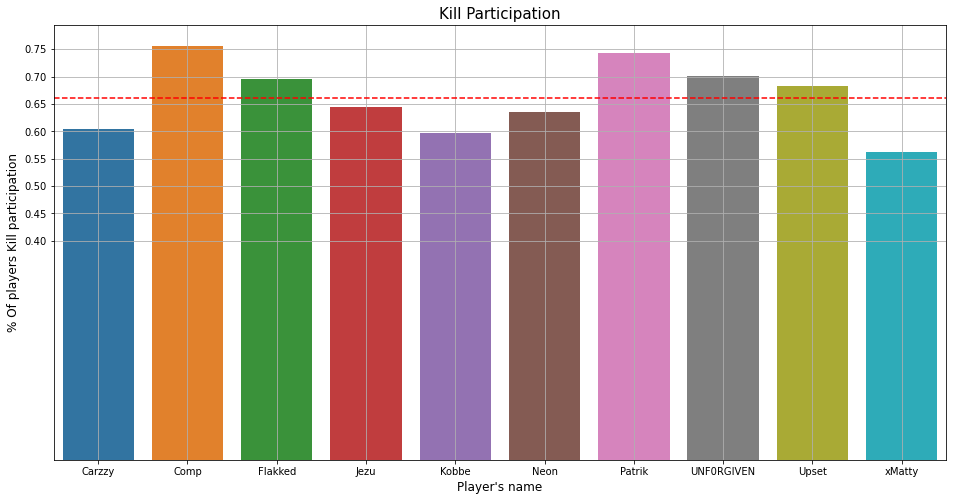

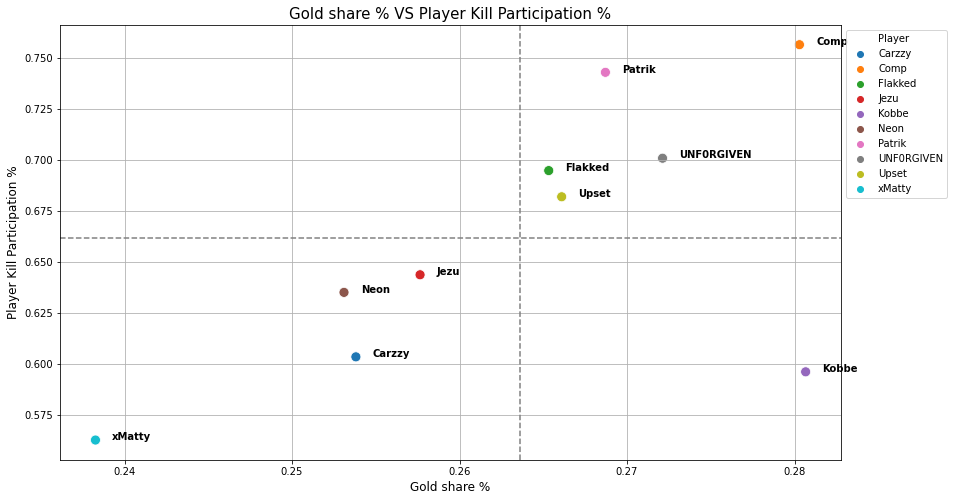

In [24]:

plt.figure(figsize = (16,8))
b3 = sns.barplot(data =spring_ADC, x= spring_ADC['Player'], y= spring_ADC['KP'])

plt.title('Kill Participation', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel("Player's name", fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('% Of players Kill participation',fontsize = label_fontsize)

plt.yticks([.4,.45,.5,.55,.6,.65,.7,.75])
plt.axhline(y=spring_ADC['KP'].mean(), color='red', linestyle='--')

plt.grid()

plt.figure(figsize = (14,8))
g5 = sns.scatterplot(data =spring_ADC, x= spring_ADC['GOLD%'], y= spring_ADC['KP'], hue = 'Player', s=100)

plt.title('Gold share % VS Player Kill Participation %', fontsize = title_fontsize)
# Set x-axis label
plt.xlabel('Gold share %', fontsize = label_fontsize)
# Set y-axis label
plt.ylabel('Player Kill Participation %', fontsize = label_fontsize)
plt.grid()

for line in range(0,spring_ADC.shape[0]):
     g5.text(spring_ADC['GOLD%'][line]+0.001,spring_ADC.KP[line], 
     spring_ADC.Player[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
        
        
plt.axvline(x=spring_ADC['GOLD%'].mean(), color='grey', linestyle='--')
plt.axhline(y=spring_ADC['KP'].mean(), color='grey', linestyle='--')  

g5.legend(bbox_to_anchor=(1, 1))



## SUPPORT

# TEAM DATASET ANALYSIS

## Filtering & adding new cols

In [25]:
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=SyntaxWarning)        
warnings.filterwarnings(
    action='ignore',
    category=SyntaxWarning,
    module=r'jmespath\.visitor'
)


data_B = spring_2022_alldata.loc[(spring_2022_alldata['league'] == league) & (spring_2022_alldata['split'] == 'Spring')
& (spring_2022_alldata['playoffs'] == 0)]

pd.options.display.float_format = '{:,.2f}'.format

# data_B['AGT'] = data_A['AGT'] / 60  # Once

data_B['DRG'] = (data_B['elementaldrakes'] + data_B['elders']) / (data_B['elementaldrakes'] + data_B['opp_elementaldrakes'] + data_B['elders'] + data_B['opp_elders'])

data_B['HLD'] = data_B['heralds'] / (data_B['heralds'] + data_B['opp_heralds'])
data_B['BN'] = data_B['barons'] / (data_B['barons'] + data_B['opp_barons'])
data_B['ELD'] = data_B['elders'] / (data_B['elders'] + data_B['opp_elders'])

data_B.rename(columns= {'teamkills':'TK', 'teamdeaths':'TD', 'firstblood':'FB','ckpm':'CKPM', 'team kpm':'TKPM',
                                 'golddiffat15':'GD15','firsttower':'FT','firsttothreetowers':'F3T','firstherald':'FHLD','firstdragon':'FD'
                                 ,'firstbaron':'FBN', 'gamelength': 'AGT', 'teamname': 'Team', 'playername':'Player'}, inplace= True)

data_B.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,DRG,HLD,BN,ELD
2520,ESPORTSTMNT04_2090326,complete,NaN,LEC,2022,Spring,0,2022-01-14 16:19:00,1,12.01,...,1.00,1.00,1.00,0.00,1.00,2.00,nan,nan,nan,nan
2521,ESPORTSTMNT04_2090326,complete,NaN,LEC,2022,Spring,0,2022-01-14 16:19:00,1,12.01,...,3.00,3.00,0.00,1.00,0.00,1.00,nan,nan,1.00,nan
2522,ESPORTSTMNT04_2090326,complete,NaN,LEC,2022,Spring,0,2022-01-14 16:19:00,1,12.01,...,2.00,3.00,0.00,0.00,0.00,3.00,nan,nan,nan,nan
2523,ESPORTSTMNT04_2090326,complete,NaN,LEC,2022,Spring,0,2022-01-14 16:19:00,1,12.01,...,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan
2524,ESPORTSTMNT04_2090326,complete,NaN,LEC,2022,Spring,0,2022-01-14 16:19:00,1,12.01,...,0.00,3.00,0.00,0.00,1.00,0.00,nan,nan,nan,nan


## Selecting specific columns & groupby


In [26]:

team_spring22 = data_B[['gameid','league', 'Team','Player' ,'AGT', 'result', 'TK', 'TD','TKPM','CKPM', 'FB','FT','F3T','FD', 
                   'DRG', 'ELD', 'HLD','FHLD', 'FBN','BN', 'GD15']]


team_spring22 = team_spring22.groupby(['Team','league']).agg({'gameid':'nunique', 'Player':'nunique', 'AGT':'mean',
                                                                      'result':'sum','TK':'mean', 'TD':'mean', 'TKPM':'mean',
                                                                      'CKPM':'mean', 'FB':'mean','FT':'mean', 'F3T':'mean',
                                                                      'FD':'mean','DRG':'mean','ELD':'mean','HLD':'mean','FHLD':'mean','FBN':'mean',
                                                                      'BN':'mean','GD15':'mean'})

team_spring22['result'] = team_spring22['result'] / 6
team_spring22['AGT'] = team_spring22['AGT'] / 60
team_spring22['GD15'] = team_spring22['GD15'] * 3

## ADDITIONAL CHANGES

team_spring22['KD'] = team_spring22['TK'] / team_spring22['TD']

team_spring22['WR'] = team_spring22['result'] / team_spring22['gameid']


team_spring22



,,gameid,Player,AGT,result,TK,TD,TKPM,CKPM,FB,FT,...,FD,DRG,ELD,HLD,FHLD,FBN,BN,GD15,KD,WR
Team,league,,,,,,,,,,,,,,,,,,,,,
Astralis,LEC,9,5,34.23,0.00,11.00,15.56,0.32,0.79,0.24,0.22,...,0.22,0.31,nan,0.22,0.11,0.33,0.22,"-1,089.44",0.71,0.00
Excel Esports,LEC,9,6,34.81,4.00,11.67,12.78,0.33,0.71,0.41,0.44,...,0.78,0.49,0.00,0.39,0.33,0.44,0.56,-59.78,0.91,0.44
Fnatic,LEC,9,5,32.85,6.00,12.22,11.67,0.38,0.75,0.20,0.78,...,0.78,0.66,nan,0.56,0.67,0.67,0.63,"1,208.22",1.05,0.67
G2 Esports,LEC,9,5,32.95,6.00,14.56,11.56,0.42,0.78,0.31,0.44,...,0.33,0.52,0.50,0.67,0.78,0.56,0.47,68.44,1.26,0.67
MAD Lions,LEC,9,5,36.09,5.00,15.22,16.11,0.41,0.86,0.44,0.67,...,0.00,0.44,0.67,0.67,0.78,0.33,0.47,397.00,0.94,0.56
Misfits Gaming,LEC,9,5,31.43,5.00,14.00,13.56,0.45,0.89,0.24,0.56,...,0.56,0.51,1.00,0.61,0.56,0.44,0.64,-244.44,1.03,0.56
Rogue,LEC,9,5,28.98,9.00,17.33,6.67,0.61,0.84,0.33,0.78,...,0.44,0.67,nan,0.50,0.44,1.00,0.92,"1,707.11",2.60,1.00
SK Gaming,LEC,9,5,33.71,2.00,11.22,15.78,0.32,0.79,0.26,0.22,...,0.78,0.47,0.33,0.39,0.33,0.22,0.12,"-2,005.67",0.71,0.22
Team BDS,LEC,9,5,33.04,3.00,10.67,14.56,0.32,0.76,0.24,0.44,...,0.56,0.45,nan,0.56,0.56,0.44,0.44,-601.89,0.73,0.33


## Merging with scraped data

In [27]:
## Additional data:

add_data_22 = pd.read_csv(f"{league}_2022_Spring.csv")

add_data_22 = add_data_22[['Team','GPR', 'GSPD', 'EGR', 'MLR','LNE%','JNG%','PPG']]

team_spring22 = team_spring22.merge(add_data_22, how='left', left_on ='Team', right_on = 'Team')

team_spring22 = team_spring22[['Team','gameid','WR','AGT','TK','TD','KD','TKPM','CKPM','GPR','GSPD','EGR','MLR','GD15','FB',
       'FT', 'F3T','PPG','FD', 'DRG', 'ELD', 'FBN', 'BN', 'FHLD','HLD', 'LNE%', 'JNG%']]


team_spring22



,Team,gameid,WR,AGT,TK,TD,KD,TKPM,CKPM,GPR,...,PPG,FD,DRG,ELD,FBN,BN,FHLD,HLD,LNE%,JNG%
0,Astralis,9,0.00,34.23,11.00,15.56,0.71,0.32,0.79,-1.32,...,3.00,0.22,0.31,nan,0.33,0.22,0.11,0.22,49.3%,43.6%
1,Excel Esports,9,0.44,34.81,11.67,12.78,0.91,0.33,0.71,0.08,...,4.30,0.78,0.49,0.00,0.44,0.56,0.33,0.39,49.3%,48.5%
2,Fnatic,9,0.67,32.85,12.22,11.67,1.05,0.38,0.75,0.85,...,5.90,0.78,0.66,nan,0.67,0.63,0.67,0.56,50.4%,54.7%
3,G2 Esports,9,0.67,32.95,14.56,11.56,1.26,0.42,0.78,0.31,...,4.60,0.33,0.52,0.50,0.56,0.47,0.78,0.67,49.7%,51.2%
4,MAD Lions,9,0.56,36.09,15.22,16.11,0.94,0.41,0.86,0.38,...,6.00,0.00,0.44,0.67,0.33,0.47,0.78,0.67,50.0%,53.6%
5,Misfits Gaming,9,0.56,31.43,14.00,13.56,1.03,0.45,0.89,0.07,...,4.60,0.56,0.51,1.00,0.44,0.64,0.56,0.61,49.8%,53.0%
6,Rogue,9,1.00,28.98,17.33,6.67,2.60,0.61,0.84,1.85,...,5.00,0.44,0.67,nan,1.00,0.92,0.44,0.50,51.1%,49.0%
7,SK Gaming,9,0.22,33.71,11.22,15.78,0.71,0.32,0.79,-1.77,...,2.80,0.78,0.47,0.33,0.22,0.12,0.33,0.39,49.5%,44.9%
8,Team BDS,9,0.33,33.04,10.67,14.56,0.73,0.32,0.76,-0.57,...,3.80,0.56,0.45,nan,0.44,0.44,0.56,0.56,49.1%,49.1%
9,Team Vitality,9,0.56,32.17,13.44,13.22,1.02,0.43,0.84,0.41,...,4.60,0.56,0.48,1.00,0.56,0.53,0.44,0.44,51.8%,52.4%


In [28]:

team_spring22['FT&F3T'] = (team_spring22['FT'] + team_spring22['F3T']) / 2

team_spring22['GSPD'] = team_spring22['GSPD'].str.rstrip('%').astype('float')
team_spring22['LNE%'] = team_spring22['LNE%'].str.rstrip('%').astype('float')
team_spring22['JNG%'] = team_spring22['JNG%'].str.rstrip('%').astype('float')

team_spring22.to_csv(f"{league}_spring_team22.csv", index = False)
team_spring22

,Team,gameid,WR,AGT,TK,TD,KD,TKPM,CKPM,GPR,...,FD,DRG,ELD,FBN,BN,FHLD,HLD,LNE%,JNG%,FT&F3T
0,Astralis,9,0.00,34.23,11.00,15.56,0.71,0.32,0.79,-1.32,...,0.22,0.31,nan,0.33,0.22,0.11,0.22,49.30,43.60,0.22
1,Excel Esports,9,0.44,34.81,11.67,12.78,0.91,0.33,0.71,0.08,...,0.78,0.49,0.00,0.44,0.56,0.33,0.39,49.30,48.50,0.50
2,Fnatic,9,0.67,32.85,12.22,11.67,1.05,0.38,0.75,0.85,...,0.78,0.66,nan,0.67,0.63,0.67,0.56,50.40,54.70,0.72
3,G2 Esports,9,0.67,32.95,14.56,11.56,1.26,0.42,0.78,0.31,...,0.33,0.52,0.50,0.56,0.47,0.78,0.67,49.70,51.20,0.39
4,MAD Lions,9,0.56,36.09,15.22,16.11,0.94,0.41,0.86,0.38,...,0.00,0.44,0.67,0.33,0.47,0.78,0.67,50.00,53.60,0.61
5,Misfits Gaming,9,0.56,31.43,14.00,13.56,1.03,0.45,0.89,0.07,...,0.56,0.51,1.00,0.44,0.64,0.56,0.61,49.80,53.00,0.61
6,Rogue,9,1.00,28.98,17.33,6.67,2.60,0.61,0.84,1.85,...,0.44,0.67,nan,1.00,0.92,0.44,0.50,51.10,49.00,0.89
7,SK Gaming,9,0.22,33.71,11.22,15.78,0.71,0.32,0.79,-1.77,...,0.78,0.47,0.33,0.22,0.12,0.33,0.39,49.50,44.90,0.17
8,Team BDS,9,0.33,33.04,10.67,14.56,0.73,0.32,0.76,-0.57,...,0.56,0.45,nan,0.44,0.44,0.56,0.56,49.10,49.10,0.44
9,Team Vitality,9,0.56,32.17,13.44,13.22,1.02,0.43,0.84,0.41,...,0.56,0.48,1.00,0.56,0.53,0.44,0.44,51.80,52.40,0.44


# VISUALIZATION TEAMS LEC SPRING SEASON 2022

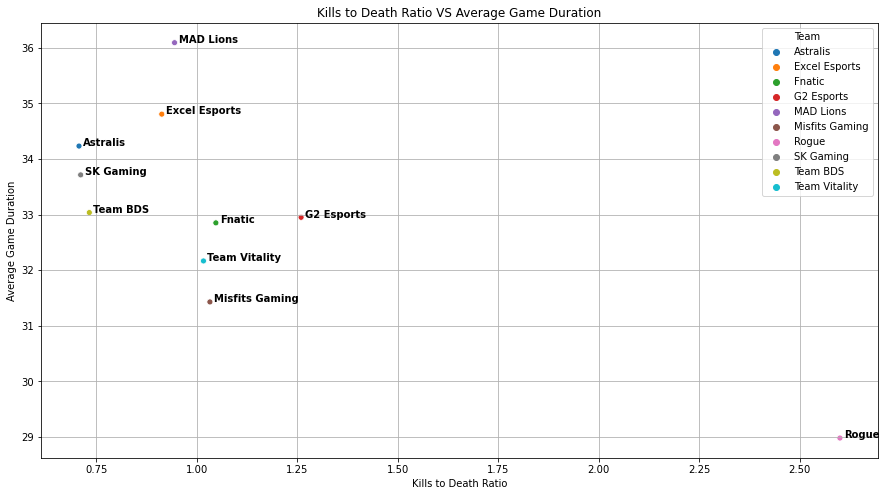

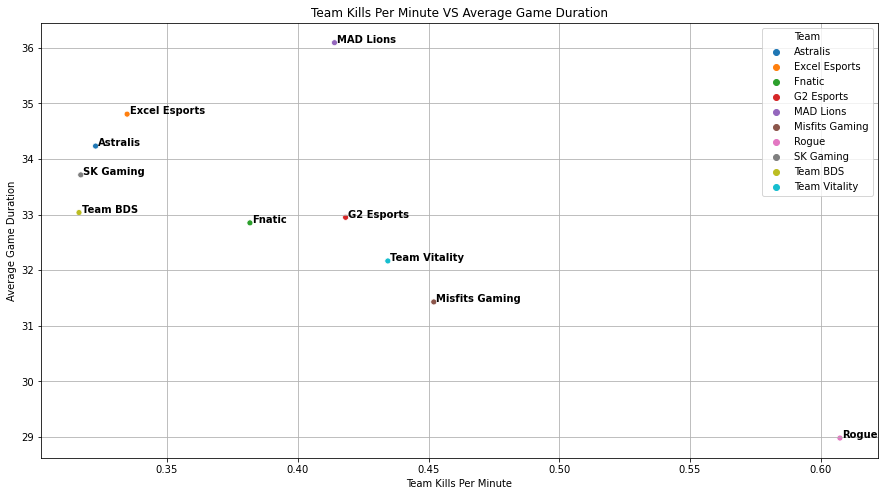

In [29]:
plt.figure(figsize = (15,8)) 

g1 = sns.scatterplot(data =team_spring22, x= team_spring22['KD'], y= team_spring22['AGT'], hue = 'Team')

plt.title('Kills to Death Ratio VS Average Game Duration')
# Set x-axis label
plt.xlabel('Kills to Death Ratio')
# Set y-axis label
plt.ylabel('Average Game Duration')

plt.grid()

for line in range(0,team_spring22.shape[0]):
     g1.text(team_spring22.KD[line]+0.01,team_spring22.AGT[line], 
     team_spring22.Team[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')



plt.figure(figsize = (15,8)) 
g2 = sns.scatterplot(data =team_spring22, x= team_spring22['TKPM'], y= team_spring22['AGT'], hue = 'Team')

plt.title('Team Kills Per Minute VS Average Game Duration')
# Set x-axis label
plt.xlabel('Team Kills Per Minute')
# Set y-axis label
plt.ylabel('Average Game Duration')
plt.grid()

for line in range(0,team_spring22.shape[0]):
     g2.text(team_spring22.TKPM[line]+0.001,team_spring22.AGT[line], 
     team_spring22.Team[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
        

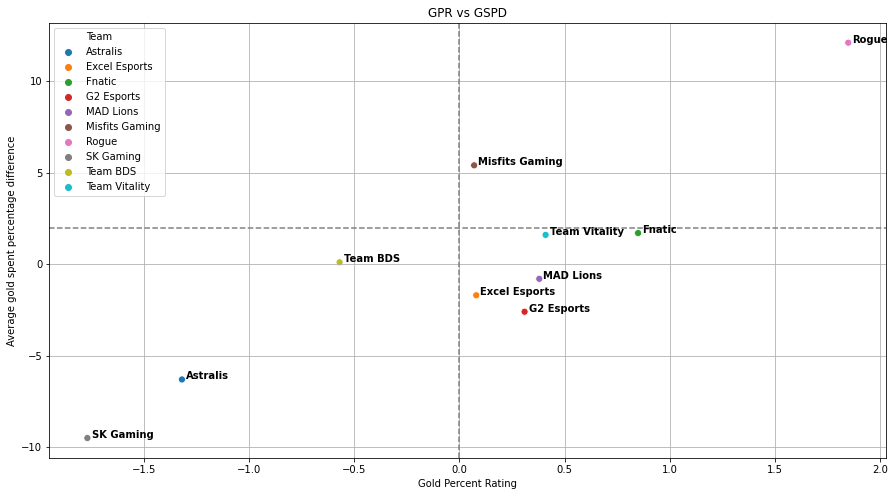

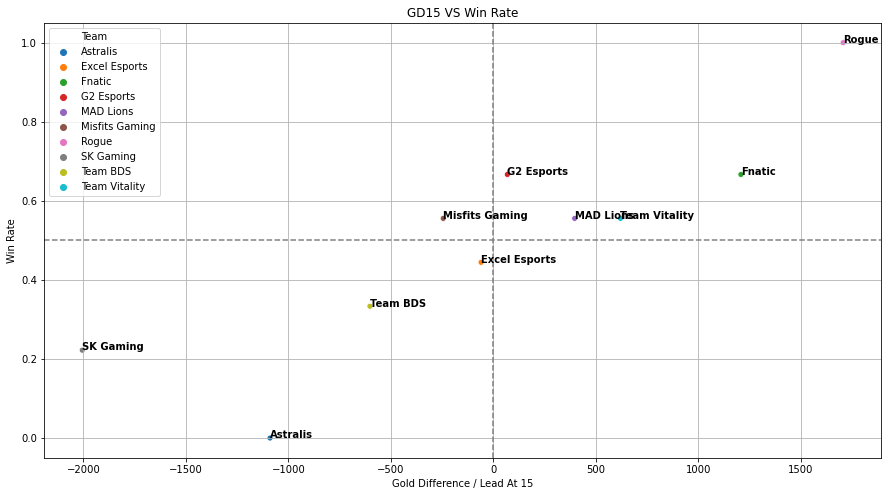

In [30]:
plt.figure(figsize = (15,8)) 

g4 = sns.scatterplot(data =team_spring22, x= team_spring22['GPR'], y= team_spring22['GSPD'], hue = 'Team', s=50)

plt.title('GPR vs GSPD')
# Set x-axis label
plt.xlabel('Gold Percent Rating')
# Set y-axis label
plt.ylabel('Average gold spent percentage difference')
plt.grid()

for line in range(0,team_spring22.shape[0]):
     g4.text(team_spring22.GPR[line]+0.02,team_spring22.GSPD[line]+0.02, 
     team_spring22.Team[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
        
plt.axhline(y=2, color='grey', linestyle='--')
plt.axvline(x=0, color='grey', linestyle='--')

plt.figure(figsize = (15,8)) 
g5 = sns.scatterplot(data =team_spring22, x= team_spring22['GD15'], y= team_spring22['WR'], hue = 'Team')

plt.title('GD15 VS Win Rate')
# Set x-axis label
plt.xlabel('Gold Difference / Lead At 15')
# Set y-axis label
plt.ylabel('Win Rate')
plt.grid()

for line in range(0,team_spring22.shape[0]):
     g5.text(team_spring22.GD15[line]+0.01,team_spring22.WR[line], 
     team_spring22.Team[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
        
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.axvline(x=0, color='grey', linestyle='--')


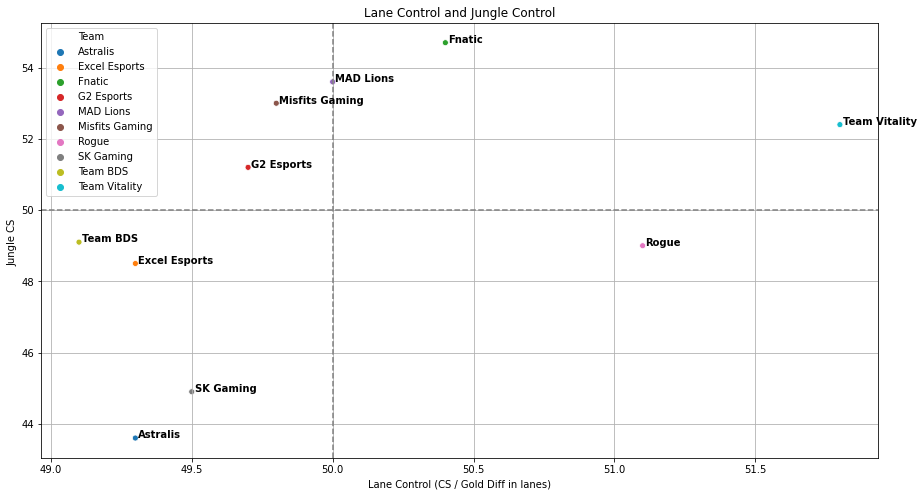

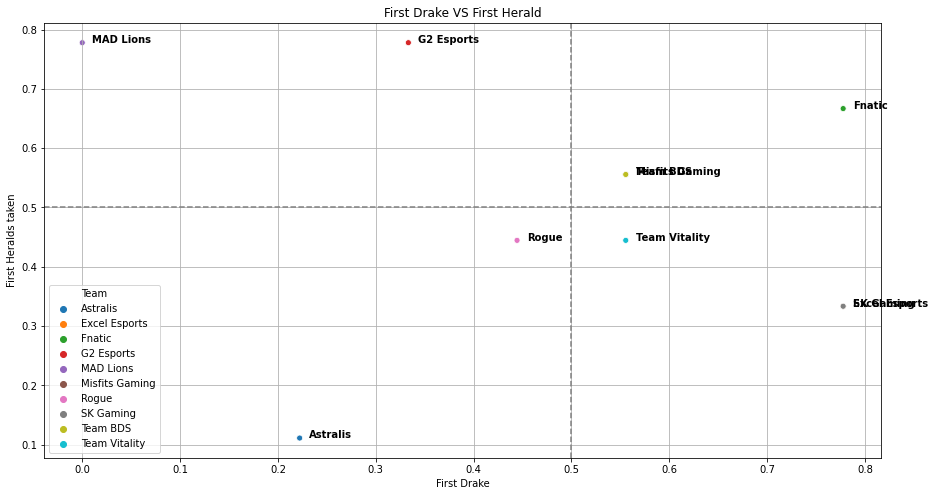

In [31]:

plt.figure(figsize = (15,8)) 
g6 = sns.scatterplot(data =team_spring22, x= team_spring22['LNE%'], y= team_spring22['JNG%'], hue = 'Team')

plt.title('Lane Control and Jungle Control')
# Set x-axis label
plt.xlabel('Lane Control (CS / Gold Diff in lanes)')
# Set y-axis label
plt.ylabel('Jungle CS ')

plt.grid()

for line in range(0,team_spring22.shape[0]):
     g6.text(team_spring22['LNE%'][line]+0.01,team_spring22['JNG%'][line], 
     team_spring22.Team[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
        
plt.axhline(y=50, color='grey', linestyle='--')
plt.axvline(x=50, color='grey', linestyle='--')


plt.figure(figsize = (15,8)) 
g7 = sns.scatterplot(data =team_spring22, x= team_spring22['FD'], y= team_spring22['FHLD'],
                     hue = 'Team')

plt.title('First Drake VS First Herald')
# Set x-axis label
plt.xlabel('First Drake')
# Set y-axis label
plt.ylabel('First Heralds taken')
plt.grid()

for line in range(0,team_spring22.shape[0]):
     g7.text(team_spring22.FD[line]+0.01,team_spring22.FHLD[line], 
     team_spring22.Team[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
        
plt.axhline(y=team_spring22['FHLD'].mean(), color='grey', linestyle='--')
plt.axvline(x=team_spring22['FD'].mean(), color='grey', linestyle='--')





# print(f'{team_spring22[["Team","GPR"]]}')

# print(f'{team_spring22[["Team","GSPD"]]}')

GPR vs GSPD graph gives a preview of how teams get ahead or are ahead in gold during the game. Individually GSPD is the % of time the team is ahead in terms of gold spend. 


In the Mid-Season Rogue went 9-0, which means most of the stats will point out how good they have played. 




# CHAMPION-PLAYER DATASET (Set up dataset, Analysis on other notebook)

## Filtering & Renaming cols & Groupby

In [32]:
data_C = spring_2022_alldata.loc[(spring_2022_alldata['league'] == league) & (spring_2022_alldata['split'] == 'Spring') & (spring_2022_alldata['playoffs'] == 0)]

data_C.rename(columns = {'position': 'Pos', 'teamname':'Team', 'gameid':'GP','kills':'K','deaths':'D','assists':'A',
                        'golddiffat10': 'GD10', 'golddiffat15':'GD15','xpdiffat10':'XPD10','csdiffat10':'CSD10','cspm':'CSPM',
                        'dpm':'DPM','damageshare':'DMG%','earnedgoldshare':'GOLD%', 'goldat10':'G10','earned gpm':'EGPM',
                        'xpat10':'XP10','csat10':'CS10','killsat10':'K10','assistsat10':'A10','deathsat10':'D10',
                        'csat15':'CS15', 'killsat15':'K15','assistsat15':'A15','deathsat15':'D15','goldat15':'G15',
                        'teamkills':'TK', 'teamdeaths':'TD', 'gamelength':'AGT','playername': 'Player', 'ban1': 'B1',
                        'ban2':'B2', 'ban3': 'B3', 'ban4': 'B4', 'ban5': 'B5'},inplace =True)

pd.options.display.float_format = '{:,.2f}'.format

## There are a bunch of columns that will be added after the groupby. Since aggregated grouped values are needed to perform calculus.

list_champ_cols = ['GP','Team','Pos','Player','champion','result','K','D','A','GD10','XPD10','CSD10','CSPM','DPM','EGPM','DMG%','GOLD%','G10','XP10','CS10','K10','D10',
                                    'A10','G15','CS15','K15','D15','A15']

champ_player_spring22 = data_C[list_champ_cols]

dict_champ_player = {'GP':'nunique','champion':'nunique','result':'sum','K':'mean','D':'mean','A':'mean','GD10':'mean','XPD10':'mean',
                     'CSD10':'mean','CSPM':'mean','DPM':'mean','EGPM':'mean','DMG%':'mean','GOLD%':'mean','G10':'mean','XP10':'mean',
                     'CS10':'mean','K10':'mean','D10':'mean','A10':'mean','G15':'mean','CS15':'mean','K15':'mean',
                     'D15':'mean','A15':'mean'}


champ_player_spring22 = champ_player_spring22.groupby(['Team', 'Player','Pos','champion']).agg(dict_champ_player)

champ_player_spring22.head()




GP  champion  result    K    D    A    GD10  \
Team     Player Pos champion                                                
Astralis Dajor  mid Akali      1         1       0 1.00 3.00 2.00 -271.00   
                    Corki      2         1       0 5.50 1.50 3.00   74.50   
                    Irelia     1         1       0 2.00 5.00 6.00 -115.00   
                    Ryze       1         1       0 3.00 2.00 3.00  247.00   
                    Sylas      1         1       0 2.00 5.00 1.00 -588.00   

                               XPD10  CSD10  CSPM  ...     XP10  CS10  K10  \
Team     Player Pos champion                       ...                       
Astralis Dajor  mid Akali    -458.00 -19.00  7.11  ... 4,359.00 75.00 0.00   
                    Corki     -54.50 -15.00  9.17  ... 4,588.00 80.00 0.50   
                    Irelia    166.00  -3.00  7.97  ... 4,613.00 79.00 1.00   
                    Ryze      -55.00  -7.00 10.99  ... 4,632.00 85.00 1.00   
                    Sylas     377.00  -3.00  6.73  ... 4,531.00 76.00 0.00   

                              D10  A10      G15   CS15  K15  D15  A15  
Team     Player Pos champion                                           
Astralis Dajor  mid Akali    0.00 0.00 4,424.00 112.00 0.00 0.00 0.00  
                    Corki    0.00 1.00 5,515.50 136.50 0.50 0.00 1.00  
                    Irelia   0.00 0.00 5,424.00 132.00 1.00 1.00 0.00  
                    Ryze     0.00 1.00 6,064.00 153.00 2.00 0.00 2.00  
                    Sylas    1.00 0.00 4,746.00 125.00 0.00 1.00 0.00  

[5 rows x 25 columns]

In [33]:
## Adding some cols

champ_player_spring22['KDA'] = (champ_player_spring22['K'] + champ_player_spring22['A']) / champ_player_spring22['D']
champ_player_spring22['WR']  = (champ_player_spring22['result'] / champ_player_spring22['GP'])
champ_player_spring22['DMGOLD'] = champ_player_spring22['DMG%'] / champ_player_spring22['GOLD%']
champ_player_spring22['DGmin'] = champ_player_spring22['DPM'] / champ_player_spring22['EGPM']

champ_player_spring22['K&A10'] = champ_player_spring22['K10'] + champ_player_spring22['A15']
champ_player_spring22['K&A15'] = champ_player_spring22['K15'] + champ_player_spring22['A15']

champ_player_spring22 = champ_player_spring22.drop('champion', 1)

champ_player_spring22.head()

GP  result    K    D    A    GD10   XPD10  \
Team     Player Pos champion                                              
Astralis Dajor  mid Akali      1       0 1.00 3.00 2.00 -271.00 -458.00   
                    Corki      2       0 5.50 1.50 3.00   74.50  -54.50   
                    Irelia     1       0 2.00 5.00 6.00 -115.00  166.00   
                    Ryze       1       0 3.00 2.00 3.00  247.00  -55.00   
                    Sylas      1       0 2.00 5.00 1.00 -588.00  377.00   

                              CSD10  CSPM    DPM  ...   CS15  K15  D15  A15  \
Team     Player Pos champion                      ...                         
Astralis Dajor  mid Akali    -19.00  7.11 358.05  ... 112.00 0.00 0.00 0.00   
                    Corki    -15.00  9.17 815.34  ... 136.50 0.50 0.00 1.00   
                    Irelia    -3.00  7.97 452.28  ... 132.00 1.00 1.00 0.00   
                    Ryze      -7.00 10.99 253.29  ... 153.00 2.00 0.00 2.00   
                    Sylas     -3.00  6.73 262.36  ... 125.00 0.00 1.00 0.00   

                              KDA   WR  DMGOLD  DGmin  K&A10  K&A15  
Team     Player Pos champion                                         
Astralis Dajor  mid Akali    1.00 0.00    1.51   2.03   0.00   0.00  
                    Corki    5.67 0.00    1.14   2.44   1.50   1.50  
                    Irelia   1.60 0.00    1.24   2.03   1.00   1.00  
                    Ryze     3.00 0.00    0.97   0.89   3.00   4.00  
                    Sylas    0.60 0.00    0.79   1.51   0.00   0.00  

[5 rows x 30 columns]

In [34]:
champ_player_spring22.reset_index(inplace =True)

champ_player_spring22.to_csv(f"{league}_champ_player_spring22.csv", index = False)

# Automatic input-based queries - Search Engine

In [35]:
# def get_region_stats(league_name):
#     team = team_spring22[team_spring22['league']==league_name][['Name','Age','Overall','Club','Position','Value']].sort_values('Overall', ascending = False)
#     return country


def get_team_stats(team_name):
    club = team_spring22[team_spring22['Team']==team_name][['Team','AGT','TK', 'TD','TKPM','CKPM', 'FB','FT','F3T','FD', 
                   'DRG', 'ELD', 'HLD','FHLD', 'FBN','BN', 'GD15']]
    return club


def get_player_stats(player_name):
    player = spring_player22[spring_player22['Player']==player_name][['Player','Team','Pos','GP','result','K','D','A','TK','TD','AGT','GD10','GD15','XPD10','CSD10',
                          'CSPM','DPM','DMG%','EGPM','GOLD%','G10','XP10','CS10','K10','D10','A10','G15','CS15','K15','D15','A15']]
    return player

def champion_stats(champion_name):
    stat = champ_player_spring22.loc[(champ_player_spring22['champion'] == champion_name)]
    pd.set_option('display.max_columns', 200)
    return stat

# player_full_bio(input('Player Name : '))

get_team_stats('Astralis')
get_player_stats('Dajor')
champion_stats('Jinx')

,Team,Player,Pos,champion,GP,result,K,D,A,GD10,XPD10,CSD10,CSPM,DPM,EGPM,DMG%,GOLD%,G10,XP10,CS10,K10,D10,A10,G15,CS15,K15,D15,A15,KDA,WR,DMGOLD,DGmin,K&A10,K&A15
8,Astralis,Kobbe,bot,Jinx,1,0,3.00,3.00,4.00,436.00,-83.00,6.00,11.08,301.12,344.90,0.19,0.33,"3,785.00","3,437.00",97.00,0.00,0.00,0.00,"6,284.00",158.00,0.00,0.00,0.00,2.33,0.00,0.57,0.87,0.00,0.00
47,Excel Esports,Patrik,bot,Jinx,3,1,3.67,2.00,2.33,-83.33,60.67,-1.00,9.61,601.17,287.35,0.32,0.27,"3,386.33","3,400.67",90.33,0.33,0.33,0.33,"5,563.33",143.00,0.33,0.33,0.33,3.00,0.33,1.17,2.09,0.67,0.67
76,Fnatic,Upset,bot,Jinx,1,1,9.00,0.00,5.00,-121.00,274.00,-3.00,10.61,"1,161.60",379.15,0.41,0.30,"3,379.00","3,814.00",88.00,0.00,0.00,2.00,"5,627.00",129.00,1.00,0.00,2.00,inf,1.00,1.37,3.06,2.00,3.00
93,G2 Esports,Flakked,bot,Jinx,2,2,4.00,1.00,7.00,56.00,-16.00,-3.50,10.32,501.89,325.54,0.25,0.27,"3,214.00","3,431.50",81.00,0.00,0.00,0.50,"5,168.00",128.50,0.50,0.50,0.50,11.00,1.00,0.92,1.54,0.50,1.00
142,MAD Lions,UNF0RGIVEN,bot,Jinx,3,2,6.33,1.67,5.00,364.33,146.00,7.33,10.64,634.90,379.33,0.34,0.33,"3,682.67","3,463.33",91.00,0.67,0.00,0.33,"6,163.33",142.00,1.00,0.33,1.00,6.80,0.67,1.05,1.67,1.67,2.00
158,Misfits Gaming,Neon,bot,Jinx,4,2,3.25,1.75,4.25,285.75,15.50,6.00,9.50,496.09,302.17,0.27,0.26,"3,595.50","3,286.00",85.75,0.75,0.00,0.00,"5,814.00",140.50,1.00,0.25,0.50,4.29,0.50,1.04,1.64,1.25,1.50
171,Rogue,Comp,bot,Jinx,4,4,6.00,1.25,7.00,301.00,156.50,2.00,10.31,692.08,384.74,0.30,0.30,"3,589.25","3,380.50",87.00,0.25,0.50,0.75,"6,080.75",144.00,1.00,0.50,1.00,10.40,1.00,1.00,1.80,1.25,2.00
210,SK Gaming,Jezu,bot,Jinx,3,1,3.67,2.00,3.67,-70.67,-323.00,-1.67,10.00,407.99,295.76,0.25,0.28,"3,488.67","3,183.67",81.33,1.00,0.33,0.67,"5,467.00",137.33,1.33,0.33,0.67,3.67,0.33,0.92,1.38,1.67,2.00
253,Team BDS,xMatty,bot,Jinx,2,1,1.50,3.00,5.00,-496.50,-160.50,-14.50,8.36,321.60,236.09,0.21,0.21,"2,991.50","3,009.00",77.00,0.00,0.00,0.00,"4,825.50",128.50,0.00,1.00,1.00,2.17,0.50,1.01,1.36,1.00,1.00
266,Team Vitality,Carzzy,bot,Jinx,4,1,2.50,2.25,3.00,-300.25,-26.50,-1.50,9.60,490.53,291.37,0.26,0.25,"3,243.00","3,450.50",87.75,0.00,0.50,0.00,"5,538.25",137.75,0.50,0.75,0.50,2.44,0.25,1.04,1.68,0.50,1.00
